# Desarrollo de pipeline semi-automático para estudiar los condicionamientos estructurales en la divergencia secuencial de proteínas

**Autor:** CE Guisande Donadio

## Bloque de Codigo 1.

### Objetivo
* Cargar liberias
* Definir funciones 

In [1]:
#Encabezado del archivo
import os,csv
import pandas as pd
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
%matplotlib inline

def cargar_txt_en_lista(file_path):
    return_list = []
    with open(file_path,"r") as openfile:
        for lines in openfile:
            return_list.append(lines.replace("\n",""))
            
    return return_list

#Filtros de String para dataframe
#Variante para una columna

def sfilter_by_col(df_query,col_name,text,has=True):
    df_return = df_query.loc[df_query[col_name].str.contains(text)==has]
    return df_return

def sfilter_linage(df_query,text,has=True):
    df_return = df_query.loc[df_query["Linage"].str.contains(text)==has]
    return df_return


def sfilter_org(df_query,text,has=True):
    df_return = df_query.loc[df_query["Organism"].str.contains(text)==has]
    return df_return

def sfilter_by_uniprot(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return df_return


def get_pdb_list_from_df(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return_list = filter_by_uniprot(df_proteins_celular,"P04637").iloc[0]["PDB_CHAIN_LIST"]
    return return_list

def printd(text):
    display(Markdown(text))
    return

def strlen(x):
    return str(len(x))

def check_not_None(thing):
    if type(thing) != type (None):
        return True
    else:
        return False

def check_is_None(thing):
    if type(thing) == type (None):
        return True
    else:
        return False
    
def endline ():
    line = "_ _ "*22
    printd("# "+line)
    return



printd("## Informe generado por el *Bloque de Codigo 1.*")
print ("Ya puede correr el siguiente bloque")
endline()

## Informe generado por el *Bloque de Codigo 1.*

Ya puede correr el siguiente bloque


# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codigo 2.

### Objetivos:
* Armar un dataframe **(df_work)** con ensembles que:
  * Uniprot SWISSPROT  
  * Tengan más de 5 cadenas en PDB
  * Más de 20 homologos en SWISSPROT

## Informe generado por el Bloque de codigo 2

**Fercha del informe**: 2019-12-11

**Reading swissprot**

Dataframe size: 560459

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs
0,Q0ATK2,ACCD_MARMM,reviewed,Acetyl-coenzyme A carboxylase carboxyl transfe...,accD Mmar10_0089,Maricaulis maris (strain MCS10),311,"cellular organisms, Bacteria, Proteobacteria, ...",MTEKSNGMSWLSKITPPGMSKIFSKRDTPDNLWVKCPVSEEMVFHK...,394221
1,O40976,1A_CMVNT,reviewed,Replication protein 1a [Includes: ATP-dependen...,ORF1a,Cucumber mosaic virus (strain NT9) (CMV),993,"Viruses, Riboviria, Bromoviridae, Cucumovirus,...",MATSSFNINELVASHGDKGLLATALVDKTAHEQLEEQLQHQRRGRK...,117124
2,Q84P24,4CLL6_ARATH,reviewed,4-coumarate--CoA ligase-like 6 (EC 6.2.1.-) (4...,4CLL6 At4g19010 F13C5.180,Arabidopsis thaliana (Mouse-ear cress),566,"cellular organisms, Eukaryota, Viridiplantae, ...",MAATHLHIPPNPKTQTSHQNPPFWFSSKTGIYTSKFPSLHLPVDPN...,3702
3,P62260,1433E_RAT,reviewed,14-3-3 protein epsilon (14-3-3E) (Mitochondria...,Ywhae,Rattus norvegicus (Rat),255,"cellular organisms, Eukaryota, Opisthokonta, M...",MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...,10116
4,P0CK20,A25_VACCC,reviewed,Protein A2.5,A2.5L,Vaccinia virus (strain Copenhagen) (VACV),76,"Viruses, Poxviridae, Chordopoxvirinae, Orthopo...",MSWYEKYNIVLNPPKRCSSACADNLTTILAEDGNHIRAILYSQPKK...,10249


**Reading PDBSWS**

swslist dataframe size: 47097

,UNIPROT_ID,PDB_CHAIN_LIST,pdb_chain_count
0,A0A010,"[5B00_A, 5B00_B, 5B00_C, 5B01_A, 5B01_B, 5B01_...",57
1,A0A011,"[3VK5_A, 3VK5_B, 3VKA_A, 3VKA_B, 3VKB_A, 3VKB_...",10
2,A0A585,[4MNQ_E],1
3,A0A5A3,"[4UDT_B, 4UDU_B]",2
4,A0A5B3,"[5NHT_B, 5NQK_B]",2


**Merge Sprot with SWS**

Dataframe size: 26550

,Length,Taxonomic lineage IDs,pdb_chain_count
count,26550.000000,2.655000e+04,26550.000000
mean,454.547081,1.216896e+05,10.030245
std,545.239279,1.946628e+05,30.223010
min,5.000000,1.700000e+01,1.000000
25%,188.000000,9.606000e+03,2.000000
50%,328.000000,1.009000e+04,4.000000
75%,529.000000,2.089640e+05,8.000000
max,34350.000000,2.510777e+06,1084.000000


### Resumen de informacion del conjunto de proteinas a estudiar

Viruses Dataframe size: 567

Celular Dataframe size: 10165

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Bacteria dataframe size: 3694

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Archaea dataframe size: 418

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Eukaryota dataframe size: 6053

### Graficos del dataframe de trabajo( Organismos Celulares)

**Histograma de Length menores a 3000**

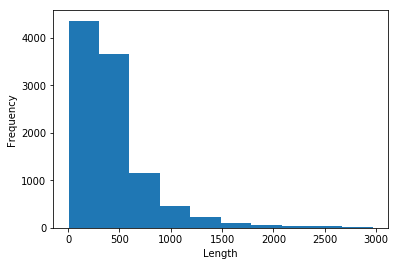

**Histograma de pdb_chain_count menores a 200**

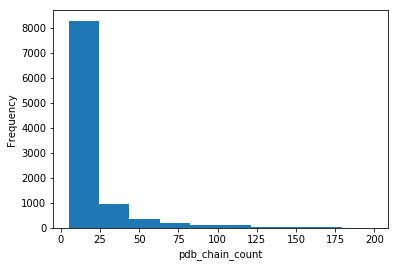

**Se guardo el archivo:** archivos_importantes/df_work_2019-12-11.tsv

Informe generado en 7.2480385303497314

Ya puede correr el siguiente bloque.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

In [2]:
import time,datetime
# MAIN/CARGA DE DATOS
printd("## Informe generado por el Bloque de codigo 2")
printd("**Fercha del informe**: "+str(datetime.date.today()))
tiempo_inicial = time.time()

log_error = dict()
log_error["SWISPROT"] = list()
log_error["PDBSWS_PDBUNIPROT"] = list()

# paths de archivos iniciales
path_swissprot_tab =  "bases_de_datos_ref/uniprot-reviewed_20190730.tab"
path_pdbwsw_pdbchain = "bases_de_datos_ref/pdb_uniprot_chain_map.lst.2"


#CARGAR SWISSPROT
printd ("**Reading swissprot**")

df_sprot = pd.read_csv(path_swissprot_tab,sep="\t")
df_sprot.columns = ['UNIPROT_ID', 
                    'Entry_name', 
                    'Status', 
                    'Protein_names', 
                    'Gene names', 
                    'Organism', 
                    'Length', 'Linage', 
                    'Sequence', 
                    'Taxonomic lineage IDs']
printd("Dataframe size: "+strlen(df_sprot))
display(df_sprot.head(n=5))


#ESTE BLOQUE SIRVE PARA CARGAR SIFTS, 
#actualmente no esta en uso
#
"""
printd ("## Reading sitfs")
df_sifts = pd.read_csv("bases_de_datos_ref/sifts_uniprot_pdb.tsv",header=1,sep="\t")
df_sifts.columns = ["UNIPROT_ID","PDB_list_sifts"]
printd("Dataframe size: "+strlen(df_sifts))
display(df_sifts.head(n=5))

printd ("Merge sprot with sifts")
df_sprot_pdb = pd.merge(df_sprot,df_sifts,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.head(n=1))
"""

###CARGAR PDBSWS
printd ("**Reading PDBSWS**")
#Esto carga la lista manualmente por que algunos codigos uniprot no figuran.
#son listas de ancho fijo (ej: '101m A P02185')
#algunas lineas del archivo 
lst_pdbsws = []
tmp_pdbsws = cargar_txt_en_lista(path_pdbwsw_pdbchain)
for index,line in enumerate(tmp_pdbsws):
    if (line[-1] != "?") and (line[-1] != " "):
        pdb_chain_id = line[0:4].upper()+"_"+line[5] 
        tmp = [pdb_chain_id,line[0:4],line[5],line[7:]]
        lst_pdbsws.append(tmp)
    else:
        #Los errores de carga de archivos se anexan a su log
        message = "Error in line "+ str(index) + ": "+ (line) 
        log_error["PDBSWS_PDBUNIPROT"].append(message)
#Borrar vbariables
del pdb_chain_id
del tmp_pdbsws
del tmp
#Crea el dataframe usando la lista
df_pdbsws = pd.DataFrame(lst_pdbsws).dropna()
df_pdbsws.columns = ["PDB_CHAIN_ID","PDB","CHAIN","UNIPROT_ID"]
#Los agrupa por pdb
df_swslist = df_pdbsws.groupby(["UNIPROT_ID"],as_index=False).agg({'PDB_CHAIN_ID':lambda x:list(x)})
#Agrega el numero de pdbs en la lista
df_swslist["pdb_chain_count"] = df_swslist.apply({"PDB_CHAIN_ID":lambda x: len(x)})
df_swslist.columns= ["UNIPROT_ID","PDB_CHAIN_LIST" ,"pdb_chain_count"]
#Informe visible
printd ("swslist dataframe size: "+strlen(df_swslist))
display(df_swslist.head())

### MERGE: AGREGA las columnas de sws a sprot, elimina los uniprot que no tengan mapeo.
printd ("**Merge Sprot with SWS**")
df_sprot_pdb = pd.merge(df_sprot,df_swslist,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.describe())

### FILTRANDO
# De las proteinas con mas de 5 cadenas, 
# Separar los virus en una tabla aparte.
df_work = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses")==False)]
df_virus = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses"))]
printd ("### Resumen de informacion del conjunto de proteinas a estudiar")
printd ("Viruses Dataframe size: "+strlen(df_virus) )
printd ("Celular Dataframe size: "+strlen(df_work))
for taxa in ["Bacteria","Archaea","Eukaryota"]:
    printd ("&nbsp;"*6+taxa+" dataframe size: "+strlen (sfilter_linage(df_work,taxa)))

printd("### Graficos del dataframe de trabajo( Organismos Celulares)")

printd("**Histograma de Length menores a 3000**")
plot_his1 = df_work["Length"].loc[df_work["Length"]<3000].plot(kind="hist")
plot_his1.set_xlabel("Length")
plt.show()


printd("**Histograma de pdb_chain_count menores a 200**")
plot_his2 = df_work["pdb_chain_count"].loc[df_work["pdb_chain_count"]<200].plot(kind="hist")
plot_his2.set_xlabel("pdb_chain_count")
plt.show()




#Esta linea guarda el df_work en un archivo tsv
df_work_path = ("archivos_importantes/df_work_"+str(datetime.date.today())+".tsv")
df_work.to_csv(df_work_path,sep="\t")
printd ("**Se guardo el archivo:** "+ df_work_path)
printd( "Informe generado en "+str(time.time()-tiempo_inicial))
printd ("Ya puede correr el siguiente bloque.")
endline()

## Bloque de Codigo 3


### Objetivos:
* Definir funciones para:
  * correr blast sobre swiwssprot
  * correr cd-hit a 0.95
  * parsear esos resultados y cargarlos en la  *variable global* **ensemeble_data**
 

In [3]:
ensemble_data = dict()
ensemble_df = dict()

In [4]:
#Crea un diciconario para acumular los datos a usar
#crea un diccionario que contiene dataframes especificos utiles
#las llaves son los uniprot_id.

def sort_cdhitcluster(list_query):
    return sorted(list_query,key = lambda x: x[2],reverse=True)

def dibujar_histograma(df_query,col):
    plot_his1 = df_query[col].plot(kind="hist")
    plot_his1.set_xlabel(col)
    plt.show()
    return

def show_ensemble_info(query):
    printd("### Mostrando datos de la proteina de estudio")
    for entry in ensemble_data[query]:
        if "sorted" in entry:
            histo = [len(ensemble_data[query][entry][x]) for x in range(30,91,10)]
            printd ("&nbsp;&nbsp;**"+entry+"** >"+ "`"+str(histo)+"`")
        else:
            printd ("&nbsp;&nbsp;**"+entry+"** >"+ "`"+str(ensemble_data[query][entry])+"`")
    return

def run_blast(fasta_file):
    output_filename = fasta_file.replace("fasta/","blast_results/").replace(".fasta","_blast_results.txt")
    cmd = "blastp -query "+ fasta_file +" -db uniprot_sprot.db -evalue 1e-10 -out "+ output_filename +" -outfmt '6 qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcovs' -num_alignments 1000"
    os.system(cmd)
    return output_filename


#el imput es el fasta con los homologos, el coef tiene que ser un string.
def cdhit_stuff(filename_hsf,coef):
    outfile_cdhit =  filename_hsf.replace("fasta/homologs_sprot/","cd-hit-results-"+coef+"/").replace("_homologs_sprot.fasta","_cd-hit")
    
    #si el archivo no existe, corre el cdhit
    if not os.path.isfile(outfile_cdhit):
        cmd = "cd-hit -i " + filename_hsf + " -o " + outfile_cdhit + " -c "+coef
        os.system(cmd)
        
    outfile_cdhit = outfile_cdhit+".clstr"
    #parsea los resultados del cdhit
    clusters = dict()    
    if os.path.isfile(outfile_cdhit):
        with open(outfile_cdhit,"r") as openfile:
            for line in openfile:
                text = line.replace("\n","")
                if text[0] == ">":
                    clus_num = (text[1:])
                    clusters[clus_num] = list()
                if text[0] in [str(x) for x in range(0,10)]:
                    uniprot_id =  (text.split(">")[1][0:6])
                    rep = int ("*" in text.split(">")[1])
                    if rep == False:
                        at_percent = float(text.split("at ")[1].replace("%",""))
                    else:
                        at_percent = float("100.00")
                    clusters[clus_num].append( [uniprot_id,bool(rep),at_percent])
        for cluster_n in clusters:
            clusters[cluster_n] = sort_cdhitcluster(clusters[cluster_n])
        return outfile_cdhit,clusters
    else:
        return "N/A","N/A"

def make_fasta_from_list(query,query_list,outfilename):
    with open(outfilename,"w") as openfile:
            openfile.write(">"+query)
            openfile.write("\n")
            openfile.write(ensemble_data[query]["Sequence"])
            openfile.write("\n")
            for uniprot_id in query_list:
                #Si la secuencia esta en el dataframe de sprot
                if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id])>0:
                    seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id]["Sequence"].iloc[0]
                    openfile.write(">"+uniprot_id)
                    openfile.write("\n")
                    openfile.write(seq)
                    openfile.write("\n")
    return outfilename


def get_cdhit_rep(uniprot_query,coef="0.95"):
    cluster_rep_list = []
    for cluster in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"]:
        for members in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"][cluster]:
            if members[1] == True:
                uniprot_id = members[0]
                df1 = ensemble_df[uniprot_query]["blast_results"]
                if len(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"] ) != 0:
                    ident_val = max(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"])
                    cluster_rep_list.append((members[0],ident_val))
                else:
                    ident_val = 0
                    cluster_rep_list.append((members[0],ident_val))
    return cluster_rep_list    

def histo_dic_cdhit(uniprot_id,coef="0.95"):
    bins =  [30,40,50,60,70,80,90]
    histo_dict = dict()
    for n in bins:
        histo_dict[n] = list()

    for id_and_ident in sorted (get_cdhit_rep(uniprot_id,coef),key = lambda x: x[1]):
        for n in bins:
            if (id_and_ident[1] >= n) and (id_and_ident[1]) < n+10:
                histo_dict[n].append(id_and_ident)
                break
    return histo_dict



#esta es la funcion importante
def estudiar_proteina(query,show=True,force=False):
    #Check que el query sea correcto
    if not query in list(df_work["UNIPROT_ID"]):
        print ("La proteina solicitada no se encuentra en df_work.")
        return False
    
    #premite la escritura en las variables globales
    global ensemble_data
    global ensemble_df
    
    if check_not_None(ensemble_data.get(uniprot_id)):
        if force==False:
            if show==True:
                show_ensemble_info(query)
            return True
            
    #carga informacion en ensemble_data y ensemble_df
    ensemble_df[query] = dict()
    ensemble_data[query] = dict(sfilter_by_uniprot(df_work,query).iloc[0])
    #da una lista 
    ensemble_data[query]["PDB_in_df_work"] = (list(set([x[0:4] for x in ensemble_data[query]["PDB_CHAIN_LIST"]])))

    #create fasta file with query seq
    with open ("fasta/"+query+".fasta","w") as openfile:
        openfile.write (">"+query+"\n")
        openfile.write (ensemble_data[query]["Sequence"]+"\n")
    
    #BUSCAR RESULTADOS DEL BLAST, SI NO EXISTEN, CORRERLO
    blast_results_filename = "blast_results/"+query+"_blast_results.txt"
    if os.path.isfile(blast_results_filename):
        if os.path.getsize(blast_results_filename) == 0:
            if show: print ("R ",end="")
            os.system("rm "+blast_results_filename)
            ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
        else:
            ensemble_data[query]["blast_results"] = blast_results_filename
    else:
        ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
    
    
    #PARSEAR LOS RESULTADOS EL BLAST y cargarlos a ensemble data
    if os.path.getsize(ensemble_data[query]["blast_results"]) > 0:
        #leer los datos importantes del blast y colocarlos en un dataframe
        df1 = pd.read_csv(ensemble_data[query]["blast_results"],header=None,sep="\t")
        df1.columns = "qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcov".split(" ")
        df1["UNIPROT_ID"] =  df1["sseqid"].str.split("|",expand=True)[1]
        #se agregan los valores de qstart y qend
        df2 = df1[["UNIPROT_ID","pident","qcov","qstart","qend","sstart","send","gaps"]].loc[(df1["UNIPROT_ID"]!=query) & (df1["pident"]>30) & (df1["qcov"]>75) ]
        
        #esta linea elimina los resultados repetidos en el blast y se queda solo con el primer hit.
        ensemble_df[query]["blast_results"] = df2.drop_duplicates(["UNIPROT_ID"])
        del df1,df2
        #carga la infomacion de los homologos al ensemble_data
        ensemble_data[query]["homologs_sprot"] = list(set(list(ensemble_df[query]["blast_results"]["UNIPROT_ID"])))
        ensemble_data[query]["homologs_in_df_work"] = list(set(df_work["UNIPROT_ID"]) & set(ensemble_data[query]["homologs_sprot"]))
    else:
        ensemble_data[query]["homologs_sprot"] = []
        if show: printd("## Alerta, blast_results still 0 "+query)    

        return False
    
    ####### SI tiene menos de 20 homologos NO SIGUE.
    if len( ensemble_data[query]["homologs_sprot"])< 20:
        return False
    
    #CREAR FASTA DE HOMOLOGOS
    filename_hsf = "fasta/homologs_sprot/"+query+"_homologs_sprot.fasta"
    if os.path.isfile(filename_hsf):
        ensemble_data[query]["homologos_sprot_fasta"] = filename_hsf
    else:
        with open(filename_hsf,"w") as openfile:
            openfile.write(">"+query)
            openfile.write("\n")
            openfile.write(ensemble_data[query]["Sequence"])
            openfile.write("\n")
            for homolog in ensemble_data[query]["homologs_sprot"]:
                #Si la secuencia esta en el dataframe de sprot
                if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog])>0:
                    seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog]["Sequence"].iloc[0]
                    openfile.write(">"+homolog)
                    openfile.write("\n")
                    openfile.write(seq)
                    openfile.write("\n")
            ensemble_data[uniprot_id]["homologos_sprot_fasta"] = filename_hsf
    
    #corre el cdhit si el archivo de salida no existe. 
    
    cdhit_results,cdhit_parsed = cdhit_stuff(filename_hsf,"0.95")
    ensemble_data[query]["cd-hit-results-0.95"] = cdhit_results
    ensemble_data[query]["cd-hit-results-0.95_parsed"] = cdhit_parsed
    ensemble_data[query]["cd-hit-sorted-0.95"] = histo_dic_cdhit(query,"0.95")
    
    #Estas lineas hacian el codigo extremadamente lento de decide hacerlo on-demand
    #ensemble_data[query]["cd-hit-results-0.95_fasta"] = make_fasta_from_list(query,[x[0] for x in get_cdhit_rep(query,"0.95")],"fasta/cdhit-0.95/"+query+"_cdhit-0.95.fasta")
    
    cdhit_results,cdhit_parsed = cdhit_stuff(filename_hsf,"0.80")
    ensemble_data[query]["cd-hit-results-0.80"] = cdhit_results
    ensemble_data[query]["cd-hit-results-0.80_parsed"] = cdhit_parsed
    ensemble_data[query]["cd-hit-sorted-0.80"] = histo_dic_cdhit(query,"0.80")
    
    
    #ensemble_data[query]["cd-hit-results-0.80_fasta"] = make_fasta_from_list(query,[x[0] for x in get_cdhit_rep(query,"0.80")],"fasta/cdhit-0.80/"+query+"_cdhit-0.80.fasta")
    
    #muestra los resutaldos hasta el momento
    if show:
        show_ensemble_info(query)
    return True

printd ("## Informe generado por el Bloque de codigo 3")
print (" ")
#Checkquer estructura de carpetas
folder_list = ["ent_files",
               "fasta",
               "blast",
               "pdb_chains",
               "cd-hit-results-0.95",
               "cd-hit-results-0.80",
               "tree"]

printd ("Verificando la estructura de carpetas.")
for folder in folder_list:
    if not os.path.isdir(folder):
        print ("* Creating folder "+ folder)
        os.mkdir(folder)
printd("Ya puede correr el siguiente bloque.")
endline()

## Informe generado por el Bloque de codigo 3

Verificando la estructura de carpetas.

Ya puede correr el siguiente bloque.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codigo 4

### Objetivos:
* Correr **estudiar_proteina(`uniprot_id`)** sobre df_work
* guardar en `list_under_20` aquellas proteinas que no tienen más de 20 homologos sprot.
* Guardar `ensemble_data` en un archivo csv

In [6]:
import ast
# Esta ejecuta la funcion estudiar_protina sobre la lista del df_work
# Solo son aceptadas aquellas que tengan <20 homologos sprot

#Solo funciona si es la unica funcio que imprime a lo largo de todo el loop sobre i
def print_progreso(i,total):
    percent = int(index/how_many*10000)/100
    print ("Completed:",index,"of",how_many,"| " + str(percent) +"%  ",end="\r")
    return

printd ("### Informe generado por Bloque de Codigo 4")

ed_filename = "archivos_importantes/ensemble_data_201911011659.csv"

#Si existe la version declarada arriba, lee los datos de ahi"
if os.path.isfile(ed_filename):
    printd ("El archivo existe")
    printd ("Cargando: `"+ed_filename+"`")
    df_reload = pd.read_csv(ed_filename)

    printd ("Ensemble data tiene: "+str(len(df_reload))+" lineas.")
    display(df_reload.head(n=2))

    #mete el df_relad en ensemble_data
    for index,uniprot_id  in enumerate(df_reload["UNIPROT_ID"]):
        print (index+1,"of",4060,end="\r")
        ensemble_data[uniprot_id] = dict()
        literal_list = ["PDB_CHAIN_LIST",  
               "PDB_in_df_work",
               "homologs_sprot",
               "homologs_in_df_work",
               "cd-hit-results-0.95_parsed",
               "cd-hit-sorted-0.95",
               "cd-hit-results-0.80_parsed",
               "cd-hit-sorted-0.80"]
        
        for labels in df_reload:
            if labels in literal_list:
                x = ast.literal_eval((df_reload.loc[(df_reload["UNIPROT_ID"]==uniprot_id)][labels].iat[0]))
            else:
                x = df_reload.loc[(df_reload["UNIPROT_ID"]==uniprot_id)][labels].iat[0]
            ensemble_data[uniprot_id][labels] = x
    
    #recalcula la list_under_20 
    list_under_20 = []
    for uniprot_id in list(df_work["UNIPROT_ID"]):
        if not uniprot_id in list(df_reload["UNIPROT_ID"]):
            list_under_20.append(uniprot_id)
    printd ("list_under_20: "+strlen(list_under_20)+" lineas.")
else:
    list_of_under_20  = []
    how_many = len(list(df_work["UNIPROT_ID"]))
    for index,uniprot_id in enumerate(list(df_work["UNIPROT_ID"])):
        run_ok =estudiar_proteina(uniprot_id,False)

        #Indicador de progreso
        if index % 25 == 0:
            print_progreso(index,how_many)
        if run_ok == False:
            list_of_under_20.append(uniprot_id)
            del ensemble_data[uniprot_id]
            #print (uniprot_id + " have been removed under 20 homolog rule")
        else:
            pass
            #print (uniprot_id + " acepted in ensemble_data")

    print ("Completed : 100%.")
    printd ("**Removed under 20 homolog rule:** ")
    printd ("`"+str(list_of_under_20[0:10])+"...`")
    printd ("**list_of_under_20:** ")
    printd ("`"+str(len(list_of_under_20))+"`")

    printd ("**Acepted in enseble data** `"+ str(list(ensemble_data)[0:10])+ "...`")
    printd ("**ensemble_data:** `"+str(len(list(ensemble_data)))+"`")

    timestamp = str(datetime.datetime.now()).replace("-","").replace(":","").replace(" ","")[0:12]
    ed_filename = "archivos_importantes/ensemble_data_" + timestamp +".csv"

    printd ("Guardando  "+ed_filename)
    df_new = pd.DataFrame.from_dict(ensemble_data,orient="index")
    df_new.head()
    df_new.to_csv(ed_filename,header=True,index=False)
    del df_new

printd("Ya puede correr el siguiente bloque.")
endline()


### Informe generado por Bloque de Codigo 4

El archivo existe

Cargando: `archivos_importantes/ensemble_data_201911011659.csv`

Ensemble data tiene: 4640 lineas.

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs,...,blast_results,homologs_sprot,homologs_in_df_work,homologos_sprot_fasta,cd-hit-results-0.95,cd-hit-results-0.95_parsed,cd-hit-sorted-0.95,cd-hit-results-0.80,cd-hit-results-0.80_parsed,cd-hit-sorted-0.80
0,A0QSL8,RPOA_MYCS2,reviewed,DNA-directed RNA polymerase subunit alpha (RNA...,rpoA MSMEG_1524 MSMEI_1488,Mycobacterium smegmatis (strain ATCC 700084 / ...,350,"cellular organisms, Bacteria, Terrabacteria gr...",MLISQRPTLSEETVAENRSRFVIEPLEPGFGYTLGNSLRRTLLSSI...,246196,...,blast_results/A0QSL8_blast_results.txt,"['Q8CX32', 'Q8A4A2', 'B5ZZ57', 'P92429', 'Q81V...","['P0A7Z4', 'Q9Z9H6', 'P9WGZ1', 'P0A7Z6', 'A7ZS...",fasta/homologs_sprot/A0QSL8_homologs_sprot.fasta,cd-hit-results-0.95/A0QSL8_cd-hit.clstr,"{'Cluster 0': [['P60315', True, 100.0]], 'Clus...","{30: [('Q7YJU6', 30.068), ('Q0ZIY7', 30.068), ...",cd-hit-results-0.80/A0QSL8_cd-hit.clstr,"{'Cluster 0': [['P60315', True, 100.0]], 'Clus...","{30: [('A6H5L3', 30.435), ('Q14FC5', 30.508000..."
1,A0R066,ILVE_MYCS2,reviewed,Branched-chain-amino-acid aminotransferase (BC...,ilvE MSMEG_4276 MSMEI_4176,Mycobacterium smegmatis (strain ATCC 700084 / ...,368,"cellular organisms, Bacteria, Terrabacteria gr...",MNSGPLEFTVSANTNPATDAVRESILANPGFGKYYTDHMVSIDYTV...,246196,...,blast_results/A0R066_blast_results.txt,"['O32954', 'P54690', 'A9UZ24', 'K7QKH1', 'P242...","['P0AB80', 'O15382', 'P54687']",fasta/homologs_sprot/A0R066_homologs_sprot.fasta,cd-hit-results-0.95/A0R066_cd-hit.clstr,"{'Cluster 0': [['O14370', True, 100.0]], 'Clus...","{30: [('K0E3V3', 31.288), ('Q58414', 31.399), ...",cd-hit-results-0.80/A0R066_cd-hit.clstr,"{'Cluster 0': [['O14370', True, 100.0]], 'Clus...","{30: [('K0E3V3', 31.288), ('Q58414', 31.399), ..."


list_under_20: 5525 lineas.

Ya puede correr el siguiente bloque.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codidgo 5

### Objetivos
* Hacer un resumen de los datos ya calculados.

In [7]:
import math

#Get the total size of a folder.
def get_size(start_path = '.'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)
    return total_size

#convierte un valor entero en bytes a human 
def bytes2human(size):
    unit = ["","k","M","G","T","P","E","Z"]
    if size > 0:
        order = int(math.log(size,1024))
        if order > (len(unit)-1):
            order = (len(unit)-1)
        size_h = str(int(size/(1024**order)))+"\t"+unit[order]+"b"
    else:
        size_h = "0\t b"
    return size_h


folder_list = ["archivos_importantes",
               "bases_de_datos_ref",
               "fasta",
               "blast_results",
               "cd-hit-results-0.95",
               "cd-hit-results-0.80",
               "tree",
               "ent_files",
               "pdb_chains"]
printd ("## Informe generado por bloque de Codigo 5")
print ("Timestamp: ",str(datetime.datetime.now()))
print ("")

for folder in folder_list:
    if os.path.isdir(folder):
        size =  bytes2human(get_size(folder))
        print (size,folder,sep="\t")
    else:
        print (folder +" is not a folder")    

print ("")

               


endline()

## Informe generado por bloque de Codigo 5

Timestamp:  2019-12-11 16:17:20.699090

508	Mb	archivos_importantes
663	Mb	bases_de_datos_ref
391	Mb	fasta
209	Mb	blast_results
225	Mb	cd-hit-results-0.95
165	Mb	cd-hit-results-0.80
186	Mb	tree
13	Gb	ent_files
187	Mb	pdb_chains



# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codigo E1

### Objetivos
* define la fucuncion `seleccionar_para_alinear`
* la aplica sobre los resultados de `ensemble_data[uniprot_id]["cd-hit-sorted-0.95"]` si:
  * antes de seleccionar tiene más de 80 homologos en total
  * la cantidad de bins vacios es menor a 3
  * despues de agregar los homologos de df_work, tiene al menos 70 homologos
* Guarda los resultados en `caped25`

## Informe generado por Bloque de Codigo E1

`caped25_notA_notB` 2996

`caped25_condA_notB `504

`caped25_condA_condB` 1140

,uniprot_id,pdb_chains,len_ali,histogram
0,A0QSL8,8,97,"[25, 25, 17, 2, 13, 6, 2]"
1,A0R3D3,5,76,"[25, 25, 11, 4, 4, 4, 0]"
2,A3M692,124,82,"[0, 25, 25, 25, 0, 1, 0]"
3,A5U4M0,18,74,"[25, 25, 14, 1, 4, 3, 0]"
4,A5U8S7,5,87,"[25, 25, 25, 3, 2, 3, 0]"


**Histograma de pdb_chains <200**

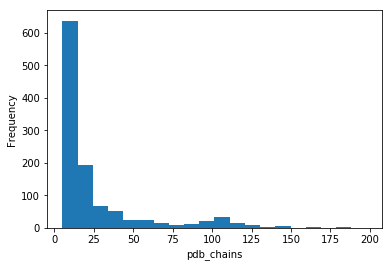

**Histograma de pdb_chains >200**

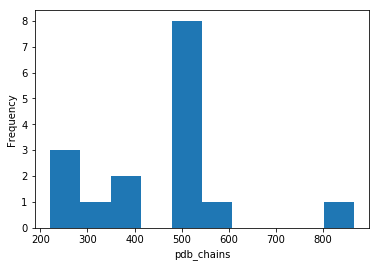

**Histograma de len_ali**

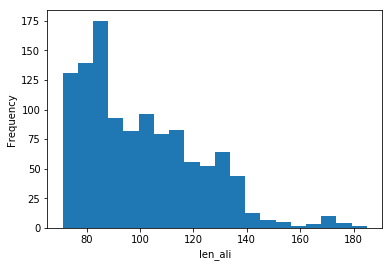

la lista `choped25` se guardo en un `archivos_importantes/choped25.csv`

Ya puede correr el siguiente bloque.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

In [8]:
#histodict_tuple: diccionario de cohortes, con lista de tuplas ordenadas by [1] (Uniprot_id,%ident)
#homologos_dfwork: una lista con los 
def seleccionar_para_alinear(histodic_tuple,homologos_dfwork,cutoff=25):
    para_alinear = dict()
    for x in range(30,91,10):
        cantidad = len(histodic_tuple[x])
        #basicamente, como cada cohorte esta ordenada por porcentaje de identidad
        # cuando hay muchos trata de cubrir todo el intervalo
        # saltando de a "k" en la iteracion.
        if cantidad > cutoff:
            seleccionados_i = []
            k = cantidad//cutoff 
            if k==0:
                k=1 #el minimo es i
            for i in range(0,cantidad,k):
                seleccionados_i.append (histodic_tuple[x][i][0])

                #para no pasarse, corta si se supera el cutoff
                if len(seleccionados_i) >= cutoff:
                    break
        else:
            #si son menos, los mandamos todos por las dudas
            seleccionados_i =  [x[0] for x in histodic_tuple[x]]

        para_alinear[x] = seleccionados_i

    histo_selec = [len(para_alinear[x]) for x in range (30,91,10)]

    #aca hay que agregar, si no estan los homologos que estan en df_work
    # si bien algunos sean descartados por los filtros, es necesario que esten
    # en los alineamientos para compararlos

    seleccionados_full = []
    for x in range (30,91,10):
        for homolgos in para_alinear[x]:
            seleccionados_full.append(homolgos)
    for ids in homologos_dfwork:
        if not ids in seleccionados_full:
            seleccionados_full.append(ids)
    
    return seleccionados_full,histo_selec


#### FIN DEL AREA DE DEFINICON DE FUNCIONES

printd("## Informe generado por Bloque de Codigo E1")


df1 = pd.DataFrame()

#para ser incluidos, deben tener + de 80 al final
count = 0
caped25_notA = []
caped25_condA_condB = []
caped25_condA_notB = []
to_dataframe = []
for uniprot_id in list(ensemble_data):
    #arma un historgrama de los cluster de ch-hit
    histo = [len(ensemble_data[uniprot_id]["cd-hit-sorted-0.95"][x]) for x in range(30,91,10)]

    #condicion A
    if (sum (histo) > 80 ) and (histo.count(0)<=3):
        cdhit95_histodic = ensemble_data[uniprot_id]["cd-hit-sorted-0.95"]
        homologos_dfwork = ensemble_data[uniprot_id]["homologs_in_df_work"]
        pdb_chains = str(ensemble_data[uniprot_id]["pdb_chain_count"])
        
        
        
        #Aca se usa la funcion para seleccionar las secuencias que van al alineamiento
        seleccionados_full,histo_selec =  seleccionar_para_alinear(cdhit95_histodic,homologos_dfwork,25)
        #condicion_B
        if len(seleccionados_full) > 70:
            # print (uniprot_id,"cdhit",histo,sum(histo),"-","-","-",sep="\t")
            to_dataframe.append ([uniprot_id,int(pdb_chains),len(seleccionados_full),histo_selec]) 
            ensemble_data[uniprot_id]["seleccionados_full"]= seleccionados_full
            count +=1
            caped25_condA_condB.append(uniprot_id)
        else:
            caped25_condA_notB.append(uniprot_id)
    else:
        caped25_notA.append(uniprot_id)

printd ("`caped25_notA_notB` "+strlen(caped25_notA))
printd ("`caped25_condA_notB `"+strlen(caped25_condA_notB))
printd ("`caped25_condA_condB` "+strlen(caped25_condA_condB))
df1 = pd.DataFrame(to_dataframe,columns=["uniprot_id","pdb_chains","len_ali","histogram"])
display(df1.head())

printd("**Histograma de pdb_chains <200**")
plot_his3 = df1["pdb_chains"].loc[df1["pdb_chains"]<200].plot(kind="hist",bins=20)
plot_his3.set_xlabel("pdb_chains")
plt.show()


printd("**Histograma de pdb_chains >200**")
plot_his4 = df1["pdb_chains"].loc[df1["pdb_chains"]>200].plot(kind="hist",bins=10)
plot_his4.set_xlabel("pdb_chains")
plt.show()


printd("**Histograma de len_ali**")
plot_his5 = df1["len_ali"].plot(kind="hist",bins=20)
plot_his5.set_xlabel("len_ali")
plt.show()

printd("la lista `choped25` se guardo en un `archivos_importantes/choped25.csv`")
df1.to_csv("archivos_importantes/choped25.csv",header=True)

printd("Ya puede correr el siguiente bloque.")
endline()

## Bloque de Codigo E2

### Objetivo
* Sobre la lista `caped25_condA_condB`
  * Alinear 
  * Convertir a phy
  * Hacer arbol

In [127]:
# para hacer el archivo fasta 
def make_fasta_from_list(query,query_list,outfilepath):
    #Chequer que el representante este antes de agregarlo
    if not query in query_list:
        query_list = [query]+list(set(query_list))
    with open(outfilepath,"w") as openfile:
        for uniprot_id in query_list:
            #Si la secuencia esta en el dataframe de sprot
            if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id])>0:
                seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id]["Sequence"].iloc[0]
                openfile.write(">"+uniprot_id)
                openfile.write("\n")
                openfile.write(seq)
                openfile.write("\n")
def fasta2phy(inputfilename,outputfilename=""):
    if outputfilename == "":
        outputfilename=inputfilename.replace(".fasta","phy")
    clustal_cmd = 'clustalw "'+inputfilename+'" -convert -output=PHYLIP -outfile="'+outputfilename+'"'
    os.system(clustal_cmd)
    return


#ingresa fasta, sale philp
def alig_fasta(inputfilename,outputfilename=""):
    if outputfilename == "":
        outputfilename=inputfilename.replace(".fasta","phy")
    clustal_cmd = 'clustalw "'+inputfilename+'" -align -convert -output=PHYLIP -outfile="'+outputfilename+'"'
    #print (clustal_cmd)
    os.system(clustal_cmd)
    return

def hacer_arbol(uniprot_id,phy_file,code=""):
    os.chdir(path+"/tree")
    os.system( 'echo "XXXXX\nY" > config'.replace("XXXXX","../"+phy_file) )
    os.system( 'phylip protdist < config') 
    os.system( 'mv outfile XXXXX_protdist_WWWWW'.replace("XXXXX",uniprot_id).replace("WWWWW",code) )
    os.system( 'echo "XXXXX_protdist_WWWWW\nJ\n99\nY" >config'.replace("XXXXX",uniprot_id).replace("WWWWW",code) ) 
    os.system( 'phylip neighbor <config')
    os.system("rm config")
    os.system("mv outfile "+uniprot_id+"_"+code+".outfile")
    os.system("mv outtree "+uniprot_id+"_"+code+".tree")
    os.chdir(path)
    return

printd ("## Informe del bloque de codigo E2")
path = "/home/emanuel/Documents/trabajo_actual/MegaScript/"
caped25 = caped25_condA_condB
for index,uniprot_id in enumerate(caped25):
    fasta_file = "fasta/caped25/"+uniprot_id+"_caped25.fasta"
    ali_phy = "alignments/"+uniprot_id+"_caped25.phy"
    out_tree = uniprot_id+"_caped25.tree"
    
    print (uniprot_id,index,"of",len(caped25),"1) FASTA",end="\r")
    
    if not os.path.isfile(fasta_file):
        make_fasta_from_list(uniprot_id, 
                         ensemble_data[uniprot_id]["seleccionados_full"],
                         path+fasta_file)
    
    
    print (uniprot_id,index,"of",len(caped25),"2) ALING",end="\r")
    if not os.path.isfile(ali_phy):
        alig_fasta(fasta_file,ali_phy)
        
    
    print (uniprot_id,index,"of",len(caped25),"3) TREE ",end="\r")
    if not os.path.isfile("tree/"+out_tree):
        hacer_arbol(uniprot_id,ali_phy,"caped25")
                          
    ensemble_data[uniprot_id]["caped25"] = [fasta_file,ali_phy,"tree/"+out_tree]
    
printd ("Ya puede correr el proximo bloque de codigo")
endline()

## Informe del bloque de codigo E2

Ya puede correr el proximo bloque de codigo

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codigo E3

### Objetivo
* Define la funcion choper que permite recortar un alineamiento fasta segun 

In [128]:
from Bio import SeqIO
#hay que darle un fasta alineado, y el nombre de la referencia en el fasta.
#la secuencia de referencia quedara arriba de todo
def choper(ali_filepath, ref,outfile,formato="fasta"):
    ali_homolog = {}
    for record in SeqIO.parse(ali_filepath,formato):
        ali_homolog[record.id] = list(record.seq) #se guarda como lista para poder borrar elementos
    ref_seq = ali_homolog[ref]
    
    #Genera una lista donde se guardan los index que deberian ser borrados
    index_for_removal = []
    for index,aa in enumerate(ref_seq):
        if aa == "-":
            index_for_removal.append(index)
    
    # Como la lista esta en orden creciente, se invierte para ir borrando de atras para adelante
    # y no cambiar el largo de las listas durante la iteracion
    index_for_removal.sort(reverse=True)

    for i in index_for_removal:
        for ids in ali_homolog:
            del ali_homolog[ids][i]
       
    #Esto es para asegurarse que la referencia quede arriba de todo
    ali_choped = {}
    ali_choped[ref] = ali_homolog[ref]
    del ali_homolog[ref]
    ali_choped.update(ali_homolog)
    
    #Esto guarda el archivo con las secuencias chopeadas
    with open(outfile,"w") as savefile:
        for ids in ali_choped:
            seq = ""
            for aa in ali_choped[ids]:
                seq += aa
                ali_choped[ids]=seq
            savefile.write(">"+ids+"\n"+ali_choped[ids]+"\n")
    return ali_choped

printd("## Informe generado por el bloque de codigo E3")

for index,uniprot_id in enumerate(caped25):
    ali_phy = ensemble_data[uniprot_id]["caped25"][1]
    outfile =  "choped/"+uniprot_id+"_ali-caped25-choped.fasta"
    print (index,"of",len(caped25),"   ",end="\r")
    if not os.path.isfile(outfile):
        choper(ali_phy,uniprot_id,outfile,"phylip")
    if not outfile in ensemble_data[uniprot_id]["caped25"]:
        ensemble_data[uniprot_id]["caped25"].append(outfile)
        
printd("Hemos terminiado por hoy")
endline()

## Informe generado por el bloque de codigo E3

Hemos terminiado por hoy

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

# Experimental code, and random filters to data

Este sector esta para experimentar codigos previos a su implementacion y analizar datos en tiempo real.

In [179]:
uniprot_to_download_pdb = list()
for index,uniprot_id in enumerate(caped25_condA_condB):
    pdb_list = ensemble_data[uniprot_id]["PDB_in_df_work"]
    pdb_count = ensemble_data[uniprot_id]["pdb_chain_count"]
    file_list = ensemble_data[uniprot_id]["caped25"]
    uniprot_to_download_pdb.append ((uniprot_id,len(pdb_list),pdb_count))
    print (index,uniprot_id,sep="\t")
    print ("","pdb_list",pdb_count,sep="\t")
    for file in file_list:
        print ("","",file,sep="\t")
    print ("")


0	A0QSL8
	pdb_list	8
		fasta/caped25/A0QSL8_caped25.fasta
		alignments/A0QSL8_caped25.phy
		tree/A0QSL8_caped25.tree
		choped/A0QSL8_ali-caped25-choped.fasta

1	A0R3D3
	pdb_list	5
		fasta/caped25/A0R3D3_caped25.fasta
		alignments/A0R3D3_caped25.phy
		tree/A0R3D3_caped25.tree
		choped/A0R3D3_ali-caped25-choped.fasta

2	A3M692
	pdb_list	124
		fasta/caped25/A3M692_caped25.fasta
		alignments/A3M692_caped25.phy
		tree/A3M692_caped25.tree
		choped/A3M692_ali-caped25-choped.fasta

3	A5U4M0
	pdb_list	18
		fasta/caped25/A5U4M0_caped25.fasta
		alignments/A5U4M0_caped25.phy
		tree/A5U4M0_caped25.tree
		choped/A5U4M0_ali-caped25-choped.fasta

4	A5U8S7
	pdb_list	5
		fasta/caped25/A5U8S7_caped25.fasta
		alignments/A5U8S7_caped25.phy
		tree/A5U8S7_caped25.tree
		choped/A5U8S7_ali-caped25-choped.fasta

5	A6QF76
	pdb_list	14
		fasta/caped25/A6QF76_caped25.fasta
		alignments/A6QF76_caped25.phy
		tree/A6QF76_caped25.tree
		choped/A6QF76_ali-caped25-choped.fasta

6	A6V1E4
	pdb_list	18
		fasta/caped25/A6V1

246	P09104
	pdb_list	36
		fasta/caped25/P09104_caped25.fasta
		alignments/P09104_caped25.phy
		tree/P09104_caped25.tree
		choped/P09104_ali-caped25-choped.fasta

247	P09446
	pdb_list	7
		fasta/caped25/P09446_caped25.fasta
		alignments/P09446_caped25.phy
		tree/P09446_caped25.tree
		choped/P09446_ali-caped25-choped.fasta

248	P09527
	pdb_list	11
		fasta/caped25/P09527_caped25.fasta
		alignments/P09527_caped25.phy
		tree/P09527_caped25.tree
		choped/P09527_ali-caped25-choped.fasta

249	P09733
	pdb_list	5
		fasta/caped25/P09733_caped25.fasta
		alignments/P09733_caped25.phy
		tree/P09733_caped25.tree
		choped/P09733_ali-caped25-choped.fasta

250	P09860
	pdb_list	8
		fasta/caped25/P09860_caped25.fasta
		alignments/P09860_caped25.phy
		tree/P09860_caped25.tree
		choped/P09860_ali-caped25-choped.fasta

251	P0A0F8
	pdb_list	7
		fasta/caped25/P0A0F8_caped25.fasta
		alignments/P0A0F8_caped25.phy
		tree/P0A0F8_caped25.tree
		choped/P0A0F8_ali-caped25-choped.fasta

252	P0A0G2
	pdb_list	7
		fasta/c

	pdb_list	7
		fasta/caped25/P24301_caped25.fasta
		alignments/P24301_caped25.phy
		tree/P24301_caped25.tree
		choped/P24301_ali-caped25-choped.fasta

524	P24316
	pdb_list	8
		fasta/caped25/P24316_caped25.fasta
		alignments/P24316_caped25.phy
		tree/P24316_caped25.tree
		choped/P24316_ali-caped25-choped.fasta

525	P24630
	pdb_list	17
		fasta/caped25/P24630_caped25.fasta
		alignments/P24630_caped25.phy
		tree/P24630_caped25.tree
		choped/P24630_ali-caped25-choped.fasta

526	P24941
	pdb_list	485
		fasta/caped25/P24941_caped25.fasta
		alignments/P24941_caped25.phy
		tree/P24941_caped25.tree
		choped/P24941_ali-caped25-choped.fasta

527	P25156
	pdb_list	133
		fasta/caped25/P25156_caped25.fasta
		alignments/P25156_caped25.phy
		tree/P25156_caped25.tree
		choped/P25156_ali-caped25-choped.fasta

528	P25321
	pdb_list	56
		fasta/caped25/P25321_caped25.fasta
		alignments/P25321_caped25.phy
		tree/P25321_caped25.tree
		choped/P25321_ali-caped25-choped.fasta

529	P25522
	pdb_list	11
		fasta/caped25

		fasta/caped25/P69892_caped25.fasta
		alignments/P69892_caped25.phy
		tree/P69892_caped25.tree
		choped/P69892_ali-caped25-choped.fasta

777	P69905
	pdb_list	519
		fasta/caped25/P69905_caped25.fasta
		alignments/P69905_caped25.phy
		tree/P69905_caped25.tree
		choped/P69905_ali-caped25-choped.fasta

778	P72508
	pdb_list	36
		fasta/caped25/P72508_caped25.fasta
		alignments/P72508_caped25.phy
		tree/P72508_caped25.tree
		choped/P72508_ali-caped25-choped.fasta

779	P76291
	pdb_list	8
		fasta/caped25/P76291_caped25.fasta
		alignments/P76291_caped25.phy
		tree/P76291_caped25.tree
		choped/P76291_ali-caped25-choped.fasta

780	P76461
	pdb_list	12
		fasta/caped25/P76461_caped25.fasta
		alignments/P76461_caped25.phy
		tree/P76461_caped25.tree
		choped/P76461_ali-caped25-choped.fasta

781	P77581
	pdb_list	14
		fasta/caped25/P77581_caped25.fasta
		alignments/P77581_caped25.phy
		tree/P77581_caped25.tree
		choped/P77581_ali-caped25-choped.fasta

782	P80040
	pdb_list	18
		fasta/caped25/P80040_caped

		choped/Q8DCF5_ali-caped25-choped.fasta

1019	Q8DEM0
	pdb_list	26
		fasta/caped25/Q8DEM0_caped25.fasta
		alignments/Q8DEM0_caped25.phy
		tree/Q8DEM0_caped25.tree
		choped/Q8DEM0_ali-caped25-choped.fasta

1020	Q8DIS5
	pdb_list	12
		fasta/caped25/Q8DIS5_caped25.fasta
		alignments/Q8DIS5_caped25.phy
		tree/Q8DIS5_caped25.tree
		choped/Q8DIS5_ali-caped25-choped.fasta

1021	Q8DTU0
	pdb_list	6
		fasta/caped25/Q8DTU0_caped25.fasta
		alignments/Q8DTU0_caped25.phy
		tree/Q8DTU0_caped25.tree
		choped/Q8DTU0_ali-caped25-choped.fasta

1022	Q8E9N3
	pdb_list	12
		fasta/caped25/Q8E9N3_caped25.fasta
		alignments/Q8E9N3_caped25.phy
		tree/Q8E9N3_caped25.tree
		choped/Q8E9N3_ali-caped25-choped.fasta

1023	Q8EE30
	pdb_list	5
		fasta/caped25/Q8EE30_caped25.fasta
		alignments/Q8EE30_caped25.phy
		tree/Q8EE30_caped25.tree
		choped/Q8EE30_ali-caped25-choped.fasta

1024	Q8EVF5
	pdb_list	8
		fasta/caped25/Q8EVF5_caped25.fasta
		alignments/Q8EVF5_caped25.phy
		tree/Q8EVF5_caped25.tree
		choped/Q8EVF5_ali-caped

In [251]:
for uniprot_id in mini_list[1090:]:
    print (uniprot_id)
    print (ensemble_data[uniprot_id]["Sequence"])
    print (ensemble_data[uniprot_id]["Protein_names"])
    print (ensemble_data[uniprot_id]["Organism"])
    print (ensemble_data[uniprot_id]["PDB_in_df_work"])
    print ("")

P0A7R1
MQVILLDKVANLGSLGDQVNVKAGYARNFLVPQGKAVPATKKNIEFFEARRAELEAKLAEVLAAANARAEKINALETVTIASKAGDEGKLFGSIGTRDIADAVTAAGVEVAKSEVRLPNGVLRTTGEHEVSFQVHSEVFAKVIVNVVAE
50S ribosomal protein L9 (Large ribosomal subunit protein bL9)
Escherichia coli (strain K12)
['3J51', '6GC8', '3J14', '3J0T', '2QBE', '3DF2', '2QBK', '5AKA', '5GAH', '3J0W', '3J11', '3OAS', '2I2T', '3J01', '1P85', '3J50', '5ADY', '3OFR', '2RDO', '3J4X', '4CSU', '3J8G', '3IY9', '2QP1', '2J28', '2Z4N', '5GAE', '4GAU', '1VT2', '4GAR', '2WWQ', '2GYC', '2QOV', '3I22', '2QBC', '3J56', '3J5A', '4KJ1', '2Z4L', '3I20', '2GYA', '1VS8', '4UY8', '2VHM', '3J5E', '3I1R', '4KJ3', '5GAG', '2QOZ', '3J19', '3J5I', '4KJ9', '2QOX', '2AW4', '2AWB', '3J7Z', '5GAF', '6GBZ', '5GAD', '1P86', '6GC4', '3J54', '3OFQ', '487D', '3J5K', '1VS6', '2QBI', '4KJ7', '3J52', '6GC0', '3DF4', '3I1T', '3J0Y', '4KIZ', '3OG0', '4KIX', '3OAT', '3OFZ', '3ORB', '3J5L', '2I2V', '3J37', '2QBG', '3J5O', '3I1N', '2QAO', '3J5W', '3J5U', '3R8S', '3J5C', '3J58', '4KJB', '3I1P', '3J12

In [252]:
ensemble_data["A0QSL8"]

{'UNIPROT_ID': 'A0QSL8',
 'Entry_name': 'RPOA_MYCS2',
 'Status': 'reviewed',
 'Protein_names': 'DNA-directed RNA polymerase subunit alpha (RNAP subunit alpha) (EC 2.7.7.6) (RNA polymerase subunit alpha) (Transcriptase subunit alpha)',
 'Gene names': 'rpoA MSMEG_1524 MSMEI_1488',
 'Organism': 'Mycobacterium smegmatis (strain ATCC 700084 / mc(2)155)',
 'Length': 350,
 'Linage': 'cellular organisms, Bacteria, Terrabacteria group, Actinobacteria, Actinobacteria (high G+C Gram-positive bacteria), Corynebacteriales, Mycobacteriaceae, Mycolicibacterium, Mycobacterium smegmatis, Mycobacterium smegmatis (strain ATCC 700084 / mc(2)155)',
 'Sequence': 'MLISQRPTLSEETVAENRSRFVIEPLEPGFGYTLGNSLRRTLLSSIPGAAVTSIRIDGVLHEFTTVPGVKEDVTDIILNLKGLVVSSDDDEPVTMYLRKQGPGVVTAGDIVPPAGVTVHNPDMHIATLNDKGKLEVELVVERGRGYVPAVQNKASGAEIGRIPVDSIYSPVLKVTYKVEATRVEQRTDFDKLIIDVETKNSISPRDALASAGGTLVELFGLARELNADSEHIEIGPSPAEADHIASFALPIDDLDLTVRSYNCLKREGVHTVGELVARTESDLLDIRNFGQKSIDEVKIKLHQLGLSLKDSPATFDPSEVAGYDAATGTWTSDAGYDLDDNQDYAETEQL

In [207]:
mini_list = []
for index,items in enumerate(sorted(uniprot_to_download_pdb,key = lambda x: x[1])[0:]):
    print (index,items)
    mini_list.append(items[0])

0 ('A6QF76', 1, 14)
1 ('A9NDG0', 1, 5)
2 ('B4RJH7', 1, 6)
3 ('B4RMG0', 1, 16)
4 ('B5BDB5', 1, 60)
5 ('B5Z9W9', 1, 8)
6 ('B7UHB4', 1, 8)
7 ('B7V2S6', 1, 6)
8 ('B8ZUN3', 1, 5)
9 ('O31675', 1, 6)
10 ('O81235', 1, 8)
11 ('P00318', 1, 6)
12 ('P06539', 1, 12)
13 ('P06633', 1, 24)
14 ('P0A6T1', 1, 6)
15 ('P0A763', 1, 6)
16 ('P0A9B7', 1, 15)
17 ('P0ABB4', 1, 12)
18 ('P0CS12', 1, 8)
19 ('P0CS13', 1, 8)
20 ('P11488', 1, 6)
21 ('P19669', 1, 20)
22 ('P24301', 1, 7)
23 ('P27997', 1, 8)
24 ('P31057', 1, 10)
25 ('P34760', 1, 10)
26 ('P39207', 1, 6)
27 ('P42980', 1, 12)
28 ('P43877', 1, 12)
29 ('P43890', 1, 6)
30 ('P46926', 1, 6)
31 ('P47895', 1, 8)
32 ('P48247', 1, 6)
33 ('P52174', 1, 6)
34 ('P54375', 1, 8)
35 ('P60706', 1, 12)
36 ('P60752', 1, 8)
37 ('P61493', 1, 7)
38 ('P63261', 1, 5)
39 ('P63788', 1, 7)
40 ('P64373', 1, 6)
41 ('P66038', 1, 30)
42 ('P68767', 1, 12)
43 ('P9WHK5', 1, 6)
44 ('P9WIL3', 1, 8)
45 ('P9WIL7', 1, 5)
46 ('P9WQ01', 1, 6)
47 ('Q04JH4', 1, 8)
48 ('Q07661', 1, 12)
49 ('Q15822', 

In [236]:
import urllib
import urllib.request 
import json
from urllib.request import urlopen
import pprint

def map_mobi_db(uniprot_query):
    try:
        url = "http://mobidb.bio.unipd.it/ws/"+uniprot_query+"/consensus"
        
        request = urllib.request.urlopen(url).read()
        data = json.loads(request.decode('utf-8'))
        return data["mobidb_consensus"]["disorder"]["full"][0]["regions"]
    except:
        return 0

count_no = 0
count_yes = 0
for uniprot_id in mini_list:
    mobidb_map = (map_mobi_db(uniprot_id))
    if mobidb_map == 0:
        count_no +=1
        print (uniprot_id)
    else:
        count_yes +=1

A6QF76
A9NDG0
B5BDB5
B5Z9W9
B7UHB4
P06633
P0A9B7
P0CS13
P27997
P42980
Q1CT76
Q2FZ20
Q2YSF8
Q5H2R3
Q830Y9
Q88P88
Q8CST1
Q9I6D1
B7MFQ9
O60259
P0A6H0
P0A6T8
P0A9M1
P0AEK3
P44427
P61227
P61492
P62938
P66035
P68137
Q02F74
Q4USQ8
Q5MZ48
A8A5E6
B7MGF2
B7MGF4
B7MLA1
O59521
P0A6F4
P0A6I5
P0A789
P0A894
P0ABA2
P28185
P60908
Q7XKV4
P01654
P0A733
P24224
P60753
Q8DEM0
Q9PF20
A5U8S7
B7MJ81
G3I8R9
P0A553
P0A793
P0A7Y7
P47547
P63097
Q03532
Q8DBF5
P0ACF2
B1MDL6
P0DP33
P24316
P60405
P60491
Q56435
Q5SHN8
Q5SHP8
Q5SHQ0
Q5SJE1
Q72GS2
Q72I01
Q9NZK7
Q72GV9
P0A5R1
P0DP28
P62442
Q8X9M2
P0DP35
Q72HR3
Q72I04
Q72I07
Q72I11
Q72I14
Q72I15
Q72I16
Q72I19
Q72I20
Q72I33
Q72JR0
Q72L76
P61824
Q72I09
P0DP31
P0DP23
Q939D2
P0DP25
P0DOY9


In [237]:
print("Yes: ",count_yes)
print("No  :",count_no)

Yes:  1039
No  : 101


In [208]:
with open("archivos_importantes/lista_pipeline_caped25.txt","w") as openfile:
    for uniprot_id in mini_list:
        openfile.write(uniprot_id+"\n")

In [281]:

path = "/home/emanuel/Documents/trabajo_actual/MegaScript"
verbose = True

def bajar_estructura(pdb_id):
    os.chdir(path+"/ent_files/")
    filename ="pdb"+pdb_id.lower()+".ent"
    url = "ftp://ftp.wwpdb.org/pub/pdb/data/structures/divided/pdb/"+pdb_id.lower()[1:3]+"/pdb"+pdb_id.lower()+".ent.gz"
    
    #Verifica que el archivo no exista antes de intentar bajarlo.
    if not os.path.isfile(filename):
        #os.system("wget ftp://ftp.wwpdb.org/pub/pdb/data/structures/all/pdb/pdb"+pdb_id.lower()+".ent.gz")
        wget_code = os.system("wget "+url)
        #Si el archivo no existe en el servidor, fue declarado obsoleto.
        #Da codigo de error 2048
        if wget_code == 2048:
            os.chdir(path)
            return ("OBSOLETE")
        #Uncompress
        os.system("gunzip pdb"+pdb_id.lower()+".ent.gz")
    else:
        if verbose: print ("\t","File "+filename+" already exists")
    os.chdir(path)
    return filename


#Esto parsea la lista de pdbs que fueron declarados obsoletosd
obsolete_dict = dict()
do_not_download = list()
with  open("archivos_importantes/obsolete.dat","r") as openfile:
    for lines in openfile:
        original = lines.replace("\n","")[20:24]
        new = lines.replace("\n","")[29:33]
        do_not_download.append(original)
        if new == "":
            obsolete_dict[original] = None
        else:
            obsolete_dict[original] = new

pdb_para_descargar = list()
for index,uniprot_id in enumerate(mini_list):
    print (index,uniprot_id)
    for pdb_id in ensemble_data[uniprot_id]["PDB_in_df_work"]:
        if not pdb_id in do_not_download:
            if not pdb_id in pdb_para_descargar:
                pdb_para_descargar.append(pdb_id)

pdb_para_descargar

0000000000111111111122222222223333333333
0123456789012345678901234567890123456789
0 A6QF76
1 A9NDG0
2 B4RJH7
3 B4RMG0
4 B5BDB5
5 B5Z9W9
6 B7UHB4
7 B7V2S6
8 B8ZUN3
9 O31675
10 O81235
11 P00318
12 P06539
13 P06633
14 P0A6T1
15 P0A763
16 P0A9B7
17 P0ABB4
18 P0CS12
19 P0CS13
20 P11488
21 P19669
22 P24301
23 P27997
24 P31057
25 P34760
26 P39207
27 P42980
28 P43877
29 P43890
30 P46926
31 P47895
32 P48247
33 P52174
34 P54375
35 P60706
36 P60752
37 P61493
38 P63261
39 P63788
40 P64373
41 P66038
42 P68767
43 P9WHK5
44 P9WIL3
45 P9WIL7
46 P9WQ01
47 Q04JH4
48 Q07661
49 Q15822
50 Q1CT76
51 Q2FZ20
52 Q2SWY6
53 Q2SWY7
54 Q2SYZ1
55 Q2YSF8
56 Q45601
57 Q45Z29
58 Q58634
59 Q59Z17
60 Q5H2R3
61 Q5HGK0
62 Q5L3Y1
63 Q5NF56
64 Q5SIL5
65 Q60177
66 Q63F05
67 Q7NGR7
68 Q7P0E6
69 Q81LV7
70 Q81WK5
71 Q830Y9
72 Q83DJ2
73 Q83LS2
74 Q88P88
75 Q8CST1
76 Q8D8W6
77 Q8Y5X1
78 Q9DF33
79 Q9HTN2
80 Q9HW02
81 Q9HXY7
82 Q9I6D1
83 Q9JZ38
84 Q9P996
85 Q9WYB1
86 Q9WYD1
87 Q9WZK0
88 Q9Z462
89 B2I1J3
90 B2S5B9
91 B6JLE2
92 B7LA2

763 P36238
764 P43813
765 P51812
766 P61077
767 P99999
768 P9WFX9
769 P9WIL4
770 Q48255
771 Q5SKU2
772 Q72GV9
773 Q9KTK0
774 A3M692
775 P00362
776 P01660
777 P01966
778 P02070
779 P0A5R1
780 P0A759
781 P0A836
782 P0ABP9
783 P0DP28
784 P0DP29
785 P11712
786 P22259
787 P39748
788 P50033
789 P61247
790 P62263
791 P62442
792 P62820
793 P9WMN3
794 P9WPA5
795 Q5SHR1
796 Q837V6
797 Q90249
798 Q9HUM0
799 A5U4M0
800 P00445
801 P00953
802 P06745
803 P07830
804 P07998
805 P0A6M8
806 P0A870
807 P12295
808 P17169
809 P21164
810 P41022
811 P66881
812 P69441
813 P80043
814 P80044
815 P9WGY7
816 P9WGZ1
817 Q47155
818 Q8E9N3
819 Q8X9M2
820 Q9Z9H5
821 P00448
822 P00703
823 P01011
824 P02605
825 P04642
826 P08238
827 P0A6F3
828 P0A6H1
829 P0A850
830 P10987
831 P20339
832 P20813
833 P29395
834 P62149
835 P62152
836 Q5JVG2
837 Q8NHY6
838 Q9RW44
839 P00830
840 P00877
841 P04695
842 P07251
843 P0A6F9
844 P0A6R0
845 P0A7K2
846 P0A8Q6
847 P0CE47
848 P11076
849 P11509
850 P25156
851 P28061
852 P43889
853 P51857

['6DKF',
 '3Q7H',
 '5TW7',
 '5V6D',
 '3MK3',
 '6AY1',
 '5Z38',
 '5TS2',
 '4J07',
 '3BL5',
 '4C7U',
 '1B33',
 '4H0M',
 '6EZM',
 '3NBU',
 '2HUR',
 '2XF8',
 '3OAA',
 '2AAZ',
 '3RBQ',
 '3R8R',
 '1LEP',
 '5NV3',
 '1M3U',
 '3SBC',
 '1U8W',
 '6F2C',
 '1UQR',
 '2A1F',
 '1NE7',
 '5FHZ',
 '5I92',
 '1BHN',
 '2RCV',
 '3J0S',
 '3B5W',
 '1WNR',
 '5JLH',
 '1Y7O',
 '2AE8',
 '3NQ4',
 '1GYT',
 '3NWY',
 '2C45',
 '1OY0',
 '2AP9',
 '5IBX',
 '1PKU',
 '5FJV',
 '2ZL2',
 '5XEX',
 '4EQY',
 '4H4G',
 '3VAV',
 '5DL1',
 '1TO0',
 '1P7O',
 '3H4P',
 '3KIP',
 '5H4V',
 '4DXE',
 '4WXY',
 '3OUG',
 '2UYG',
 '2GTC',
 '3GD5',
 '2A7W',
 '4MWA',
 '3TY6',
 '6C8Q',
 '1Y2I',
 '6CN1',
 '5YJJ',
 '5IZN',
 '4UQF',
 '1M8T',
 '2BUF',
 '5VVW',
 '1U1Z',
 '5X6F',
 '5DKP',
 '1J2Q',
 '2IIR',
 '1VPX',
 '1VLH',
 '1IOK',
 '5D8D',
 '5DMX',
 '4ZG5',
 '5H9G',
 '5H9H',
 '5JI3',
 '5JI2',
 '5TWJ',
 '5TWK',
 '3VR1',
 '3VQT',
 '3GPR',
 '5THP',
 '1OOJ',
 '5H7D',
 '3NV7',
 '3OTW',
 '1VI5',
 '1VI6',
 '1J2P',
 '1B4A',
 '1B4B',
 '2YRF',
 '2YVK',
 '3AHU',
 

In [451]:
bajar_estructura("1LXA")

	 File pdb1lxa.ent already exists


'pdb1lxa.ent'

In [308]:
from Bio.PDB import PDBIO,PPBuilder,PDBParser

def split_by_chain_and_model(pdb_id):
    if not os.path.isdir("pdb_chains/"+pdb_id.upper()):
            os.mkdir("pdb_chains/"+pdb_id.upper())
    io = PDBIO()
    actual_pdbfile = PDBParser().get_structure(pdb_id,"ent_files/pdb"+pdb_id.lower()+".ent")
    
    seq_dict = dict()
    for model in actual_pdbfile:
        for chain in model:
            #io.set_structure(chain)
            
            outfilename = pdb_id.upper() + "-" + str(model.get_id()+1) +  "_" + str(chain.get_id()) + ".pdb"
            if not os.path.isfile:
                io.save("pdb_chains/"+pdb_id.upper()+"/"+outfilename)
            seq = PPBuilder().build_peptides(chain)[0].get_sequence()
            seq_dict[outfilename] = seq
    return seq_dict

for index_i,uniprot_id in enumerate(mini_list[0:]):
    print (index_i,uniprot_id)
    for index_j,pdb_id in enumerate(ensemble_data[uniprot_id]["PDB_in_df_work"]):
        entfilename = "pdb" +pdb_id.lower()+".ent"
        if os.path.isfile("ent_files/"+entfilename):
            print ("\t",index_j,pdb_id,entfilename,sep="\t")
            ensemble_data[uniprot_id]["structures_seqs"] =  split_by_chain_and_model(pdb_id)
        else:
            print ("\t",index_j,pdb_id,"ERROOR on file!",sep="\t")
            
            
    

0 A6QF76
		0	6DKF	pdb6dkf.ent
1 A9NDG0
		0	3Q7H	pdb3q7h.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22524.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22546.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22569.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 22592.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 22601.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 22611.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

2 B4RJH7
		0	5TW7	pdb5tw7.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 46963.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 46964.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 46965.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 46967.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 46968.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 47115.
  PDBConstructionWarning)


3 B4RMG0
		0	5V6D	pdb5v6d.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 38839.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 38860.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 38877.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 38898.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 38915.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 38932.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

4 B5BDB5
		0	3MK3	pdb3mk3.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 69119.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 69129.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 69134.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 69139.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 69144.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 69149.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

5 B5Z9W9
		0	6AY1	pdb6ay1.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17972.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17976.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17988.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17996.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 18004.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18012.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

6 B7UHB4
		0	5Z38	pdb5z38.ent
7 B7V2S6
		0	5TS2	pdb5ts2.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16681.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16727.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16773.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16820.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 16866.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 16912.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

8 B8ZUN3
		0	4J07	pdb4j07.ent
9 O31675
		0	3BL5	pdb3bl5.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10172.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10179.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10186.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10193.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10200.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 10207.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

10 O81235
		0	4C7U	pdb4c7u.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27334.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27335.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27336.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27337.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 27338.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 27339.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

11 P00318
		0	1B33	pdb1b33.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16579.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16622.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16665.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16713.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 16756.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 16804.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

12 P06539
		0	4H0M	pdb4h0m.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31297.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 31340.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31426.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 31469.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 31555.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 31598.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

13 P06633
		0	6EZM	pdb6ezm.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain U is discontinuous at line 40796.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40826.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40856.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 40886.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 40916.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 40931.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

14 P0A6T1
		0	3NBU	pdb3nbu.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27098.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27099.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27679.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28322.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 28844.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 29353.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

15 P0A763
		0	2HUR	pdb2hur.ent
16 P0A9B7
		0	2XF8	pdb2xf8.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 41968.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 42017.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 42022.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 42071.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 42076.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 42125.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

17 P0ABB4
		0	3OAA	pdb3oaa.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 203155.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 203219.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 203283.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 203347.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 203408.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 203413.
  PDBConstructionWarning)
/usr/lib/python3/dist-

18 P0CS12
		0	2AAZ	pdb2aaz.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 41085.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 41140.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 41195.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 41250.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 41305.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 41360.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 162183.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 162238.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 162293.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 162348.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 162403.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 162458.
  PDBConstructionWarning)
/usr/lib/python3/dist-

19 P0CS13
		0	2AAZ	pdb2aaz.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 41085.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 41140.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 41195.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 41250.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 41305.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 41360.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 162183.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 162238.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 162293.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 162348.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 162403.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 162458.
  PDBConstructionWarning)
/usr/lib/python3/dist-

20 P11488
		0	3RBQ	pdb3rbq.ent
21 P19669
		0	3R8R	pdb3r8r.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9685.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9856.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9988.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10125.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10274.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 10378.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/

22 P24301
		0	1LEP	pdb1lep.ent


/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 64166.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 64177.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 64188.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 64193.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 64198.
  PDBConstructionWarning)
/usr/lib/python3/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 64209.
  PDBConstructionWarning)
/usr/lib/python3/dist-packag

IndexError: list index out of range

# Bloque especial para procesar PDBs

QINQVRPKLPLLKILHAAGAQGEMFTVKEVMHYLGQYIMVKQLYDQQEQHMVYCGGDLLGELLGRQSFSVKDPSPLYDMLRKNLVTLAT
01111121001112211111111121111211121122111122110011122211102111211112110101111111011211000
94000000000000000000000000000000000000000000000000000031000000000000000000000000000000189


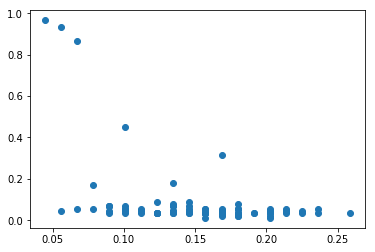

In [23]:
import os
import numpy as np
import seaborn as sns

path = "/home/emanuel/Documents/trabajo_actual/MegaScript"
verbose = False

def bajar_estructura(pdb_id):
    os.chdir(path+"/ent_files/")
    filename ="pdb"+pdb_id.lower()+".ent"
    url = "ftp://ftp.wwpdb.org/pub/pdb/data/structures/divided/pdb/"+pdb_id.lower()[1:3]+"/pdb"+pdb_id.lower()+".ent.gz"
    
    #Verifica que el archivo no exista antes de intentar bajarlo.
    if not os.path.isfile(filename):
        #os.system("wget ftp://ftp.wwpdb.org/pub/pdb/data/structures/all/pdb/pdb"+pdb_id.lower()+".ent.gz")
        wget_code = os.system("wget "+url)
        #Si el archivo no existe en el servidor, fue declarado obsoleto.
        #Da codigo de error 2048
        if wget_code == 2048:
            os.chdir(path)
            return ("OBSOLETE")
        #Uncompress
        os.system("gunzip pdb"+pdb_id.lower()+".ent.gz")
    else:
        if verbose: print ("\t","File "+filename+" already exists")
    os.chdir(path)
    return filename

#Le das un archivo y le el EXPDTA u NUMMDL
def read_expdata(path_to_pdbfile):
    with open(path_to_pdbfile,"r") as openfile:
        expdata = ""
        nummodel = 1
        for row in openfile:
            if "EXPDTA" in row:
                expdata +=  (row[9:-1].strip())
                if "X-RAY" in expdata:
                    break
                else:
                    continue
            elif "NUMMDL" in row:
                nummodel = int((row[9:-1].strip()))
                break
            elif "REMARK" in row:
                break
            elif "ATOM" in row:
                break
    return expdata,nummodel



def read_atom_full(pdb_file):
    expdata,nummodel = read_expdata(pdb_file)
    return_dict = dict()
    with open(pdb_file,"r") as openfile:
        model = 1
        return_dict[1]= list()
        for row in openfile:
            line_lst = list()
            if nummodel>1:
                if row[0:6] == "ENDMDL":
                    model +=1
                    if model > nummodel:
                        break
                    return_dict[model]= list()
            if row[0:5] == "ATOM ":
                tmp_lst = []
                tmp_lst.append(int(row[6:10+1])) #Integer serial Atom serial number.
                tmp_lst.append(row[12:15+1].strip()) #Atom name Atom name.
                tmp_lst.append(row[16+1]) #Character altLoc Alternate location indicator.
                tmp_lst.append(row[17:19+1]) #Residue name resName Residue name.
                tmp_lst.append(row[21]) #Character chainID Chain identifier.
                tmp_lst.append(int(row[22:25+1])) #Integer resSeq Residue sequence number.
                tmp_lst.append(row[26+1]) #AChar iCode Code for insertion of residues.
                tmp_lst.append(row[30:37+1]) #Real(8.3) x Orthogonal coordinates for X in Angstroms.
                tmp_lst.append(row[38:45+1]) #Real(8.3) y Orthogonal coordinates for Y in Angstroms.
                tmp_lst.append(row[46:53+1]) #Real(8.3) z Orthogonal coordinates for Z in Angstroms.
                tmp_lst.append(row[54:59+1]) #Real(6.2) occupancy Occupancy.
                tmp_lst.append(row[60:65+1]) #Real(6.2) tempFactor Temperature factor.
                tmp_lst.append(row[76:77+1]) #LString(2) element Element symbol, right-justified.
                tmp_lst.append(row[78:89+1].replace("\n","")) #LString(2) charge Charge on the atom.
                return_dict[model].append(tmp_lst)
            
    return expdata,nummodel,return_dict

def print_fixed(query_str,fix=100):
    for index,char in enumerate(query_str):
        print (char,end="")
        if (index+1)%fix ==0:
            print ("")
    print ("")
    return

def calc_median(query_list):
    if len(query_list)>1:
        if len(query_list)%2 == 0:
            pos = (len(query_list)//2)-1
            median_value = (query_list[pos]+query_list[pos+1])/2
        else:
            pos = (len(query_list)//2)-1
            median_value = query_list[pos]
    else:
        median_value = query_list[0]
    return int(median_value)

def read_and_parse_pdb_file(pdb_id,chain):
    ensemblito = dict()
    expdata,nummodel,raw =  read_atom_full("ent_files/"+bajar_estructura(pdb_id))
    for model in raw:
        seq_stru = dict()
        for atom in raw[model]:
            if (atom[1] == "CA") and (atom[4] == chain):
                x = float(atom[7])
                y = float(atom[8])
                z = float(atom[9])
                cord = (x,y,z)
                seq_stru[int(atom[5])]=[atom[3],cord]
        ensemblito[model] = seq_stru    
    return expdata,nummodel,ensemblito



d = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 'TER':'*',
     'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M','XAA':'X'}        



expdata,nummodel,ensemblito = read_and_parse_pdb_file("2MWY","A")

            

conjunto = dict()
for model in ensemblito:
    #esto crea la matris de distancias.
    sequ = ""
    vector =dict()
    seq_str = ensemblito[model]
    for i in seq_str:
        if check_is_None(vector.get(i)):
            vector[i] = dict()
        sequ += d[seq_str[i][0]]
        for j in seq_str:
            cord1 = seq_str[i][1]
            cord2 = seq_str[j][1]

            dist=( (cord2[0]-cord1[0])**2 + (cord2[1]-cord1[1])**2 + (cord2[2]-cord1[2])**2) ** 0.5
            vector [i][j] = dist 


    ij_map = list()
    for i in vector:
        show = ""
        for j in vector[i]:
            if vector[i][j] < 10:
                show+=str(int(vector[i][j]))
            else: 
                show+="-"
        ij_map.append(show)
    conjunto[model] = {"sequence":sequ,"vector":vector,"ij_map":ij_map}
    
    
    aver_map = dict()


for model in range(1,model+1):
    for fixed in list(conjunto[model]["vector"].keys()):
        if check_is_None(aver_map.get(fixed)):
            aver_map[fixed] = dict()
        for r in (conjunto[model]["vector"][i]):
            if check_is_None(aver_map[fixed].get(r)):
                aver_map[fixed][r] = list()
            dist = conjunto[model]["vector"][fixed][r]
            aver_map[fixed][r].append(dist)


contact_map_full =  []
std_map_full = []



for fixed in aver_map:
    # print (fixed)
    contact_map =[]
    std_map =[]
    
    for pos in aver_map[fixed]:
        mean = np.mean(aver_map[fixed][pos])
        median  = calc_median(aver_map[fixed][pos])
        std = np.std(aver_map[fixed][pos])
        #print ("\t",pos,mean,std)
        
        if (pos > fixed+1 )or (pos <fixed-1):
            #10 amstrom
            if median<10:            
                contact_map.append(1)
            else:
                contact_map.append(0)

            #1 de std
            if std>0.7:
                std_map.append(1)
            else:
                std_map.append(0)
        else:
            contact_map.append(0)
            std_map.append(0)
                


    contact_map_full.append (contact_map)
    std_map_full.append(std_map)

x_list = []
y_list = []

print (sequ)
for n in range(0,len(aver_map)):
    x = sum(contact_map_full[n])
    x_list.append(x)
    
for n in range(0,len(aver_map)):
    y = sum(std_map_full[n])
    y_list.append(y)
    
x_list = [(x/len(x_list)) for x in x_list]
y_list = [(y/len(y_list)) for y in y_list]
    
for x in x_list:
    print(int(x*10),end="")
print ("")

for y in y_list:
    print(int(y*10),end="")
print ("")


plt.plot(x_list, y_list,"o")
plt.show()


    

In [20]:
ensemblitos = dict()
for pdb_chain in ensemble_data["P60472"]["PDB_CHAIN_LIST"]:
    pdb_id = pdb_chain[0:4]
    chain = pdb_chain[-1]
    expdata,nummodel,ensemblitos[pdb_chain] =  read_and_parse_pdb_file(pdb_id,chain)
    
import pprint
pprint.pprint(ensemblitos)
    

{'1JP3_A': {1: {13: ['LEU', (28.177, 11.321, 1.0)],
                14: ['PRO', (27.88, 12.965, 1.0)],
                15: ['ALA', (24.376, 13.277, 1.0)],
                16: ['HIS', (24.123, 17.024, 1.0)],
                17: ['GLY', (24.941, 16.395, 1.0)],
                18: ['CYS', (27.609, 18.962, 1.0)],
                19: ['ARG', (31.251, 18.355, 1.0)],
                20: ['HIS', (32.769, 21.828, 1.0)],
                21: ['VAL', (31.918, 24.815, 1.0)],
                22: ['ALA', (33.258, 28.336, 1.0)],
                23: ['ILE', (33.075, 30.984, 1.0)],
                24: ['ILE', (33.313, 34.771, 1.0)],
                26: ['ASP', (33.274, 38.973, 1.0)],
                27: ['GLY', (32.587, 40.512, 1.0)],
                28: ['ASN', (35.998, 40.332, 1.0)],
                29: ['GLY', (36.262, 44.112, 1.0)],
                30: ['ARG', (32.692, 44.641, 1.0)],
                31: ['TRP', (33.052, 41.776, 1.0)],
                32: ['ALA', (36.069, 43.442, 1.0)],
             

 '2E9A_A': {1: {14: ['PRO', (28.396, 13.011, 1.0)],
                15: ['ALA', (24.729, 13.393, 1.0)],
                16: ['HIS', (24.593, 17.115, 1.0)],
                17: ['GLY', (25.624, 16.476, 1.0)],
                18: ['CYS', (28.096, 19.356, 1.0)],
                19: ['ARG', (31.566, 18.784, 1.0)],
                20: ['HIS', (33.006, 22.299, 1.0)],
                21: ['VAL', (32.123, 25.34, 1.0)],
                22: ['ALA', (33.42, 28.91, 1.0)],
                23: ['ILE', (33.182, 31.487, 1.0)],
                24: ['ILE', (33.416, 35.291, 1.0)],
                25: ['MET', (34.575, 36.064, 1.0)],
                26: ['ASP', (33.473, 39.515, 1.0)],
                27: ['GLY', (32.658, 41.439, 1.0)],
                28: ['ASN', (35.725, 40.998, 1.0)],
                29: ['GLY', (36.143, 44.761, 1.0)],
                30: ['ARG', (32.49, 45.453, 1.0)],
                31: ['TRP', (32.638, 42.652, 1.0)],
                32: ['ALA', (35.648, 44.233, 1.0)],
                

                117: ['ASN', (16.065, -2.801, 1.0)],
                118: ['SER', (15.146, -0.048, 1.0)],
                119: ['ARG', (18.535, 1.68, 1.0)],
                120: ['LEU', (18.576, 1.896, 1.0)],
                121: ['GLN', (14.979, 3.202, 1.0)],
                122: ['GLU', (16.012, 5.948, 1.0)],
                123: ['ARG', (19.075, 6.843, 1.0)],
                124: ['ILE', (16.731, 7.117, 1.0)],
                125: ['ARG', (14.353, 9.336, 1.0)],
                126: ['LYS', (17.186, 11.536, 1.0)],
                127: ['SER', (18.658, 11.962, 1.0)],
                128: ['GLU', (15.257, 12.891, 1.0)],
                129: ['ALA', (14.641, 15.312, 1.0)],
                130: ['LEU', (18.056, 16.93, 1.0)],
                131: ['THR', (17.559, 17.742, 1.0)],
                132: ['ALA', (13.706, 18.192, 1.0)],
                133: ['GLY', (14.071, 21.989, 1.0)],
                134: ['ASN', (16.386, 21.996, 1.0)],
                135: ['THR', (15.127, 23.786, 1.0)],
  

                198: ['GLU', (15.457, 30.003, 1.0)],
                199: ['HIS', (18.679, 31.571, 1.0)],
                200: ['ARG', (20.97, 31.307, 1.0)],
                201: ['ILE', (22.114, 33.314, 1.0)],
                202: ['SER', (21.548, 30.397, 1.0)],
                203: ['ASN', (24.155, 31.71, 1.0)],
                204: ['PHE', (22.345, 35.013, 1.0)],
                205: ['LEU', (24.733, 38.004, 1.0)],
                206: ['LEU', (28.133, 37.115, 1.0)],
                207: ['TRP', (30.675, 39.673, 1.0)],
                208: ['GLN', (28.192, 42.482, 1.0)],
                209: ['ILE', (27.012, 41.601, 1.0)],
                210: ['ALA', (30.346, 41.897, 1.0)],
                211: ['TYR', (29.047, 44.717, 1.0)],
                212: ['ALA', (25.267, 44.515, 1.0)],
                213: ['GLU', (22.807, 44.172, 1.0)],
                214: ['LEU', (21.084, 40.719, 1.0)],
                215: ['TYR', (17.467, 40.538, 1.0)],
                216: ['PHE', (15.628, 37.199, 1.

                133: ['GLY', (76.629, 90.263, 1.0)],
                134: ['ASN', (78.983, 90.457, 1.0)],
                135: ['THR', (77.735, 92.068, 1.0)],
                136: ['GLY', (80.076, 90.839, 1.0)],
                137: ['LEU', (80.012, 87.391, 1.0)],
                138: ['THR', (77.757, 84.852, 1.0)],
                139: ['LEU', (79.541, 81.5, 1.0)],
                140: ['ASN', (77.346, 78.467, 1.0)],
                141: ['ILE', (79.07, 75.166, 1.0)],
                142: ['ALA', (76.909, 72.091, 1.0)],
                143: ['ALA', (77.749, 69.487, 1.0)],
                144: ['ASN', (75.77, 66.235, 1.0)],
                145: ['TYR', (73.291, 68.122, 1.0)],
                146: ['GLY', (70.625, 66.787, 1.0)],
                147: ['GLY', (68.106, 68.647, 1.0)],
                148: ['ARG', (65.28, 66.28, 1.0)],
                149: ['TRP', (66.229, 66.533, 1.0)],
                150: ['ASP', (66.214, 70.319, 1.0)],
                151: ['ILE', (62.638, 70.352, 1.0)],

In [104]:
# Conctac Map full
for fixed in aver_map:
    for pos in aver_map[fixed]:
        value = np.median(aver_map[fixed][pos])
        if value<10:
            print (int(value),end="")
        else:
            print ("-",end="")
    print ("")

0359---------------------988---------------------------------------------------------9-87
30268--------------------6568---------------------------------------------------8---96765
52036-------------------845679--------------------------------------------------99-974443
9630369----------------7425668--------------------------------------------------99-852146
-8630369-----------9998412564699-----------------------------------------------9978522479
---630359-87--89--966541268967---------------------------------------------------987357--
---96302674477569852344558--66-97------------------------------------------------87658---
----952035426754885303467---99--9-------------------------------------------------997----
-----963035236636855357------------------------------------------------------------------
------75303303413534589---------8--98--------------------9-------------------------------
-----84453023312441147899---97-968-88------------------------9-------------------9788----
-----74223

In [90]:
aver_map[1][4]

[9.718416794931157,
 8.473784986651479,
 9.530254980849149,
 10.181993616183423,
 9.244131165231268,
 9.605376202939684,
 9.399738772965982,
 9.320268504715942,
 9.257659531436657,
 9.101434447382456,
 9.946340884968704,
 7.909641268730207,
 9.900861831174092,
 7.9990020627575795,
 10.16479399692881,
 9.133018997023932,
 9.408277472523864,
 10.075773915685087,
 9.807288973003704,
 10.23637562812151]

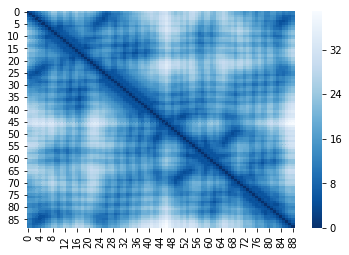

In [30]:
import numpy as np
import seaborn as sns

heatmap_data = []
for fixed in aver_map:
    line = []
    for pos in aver_map[fixed]:
        val = np.average (aver_map[fixed][pos])
        line.append(val)        
    heatmap_data.append(line)


display(sns.heatmap(heatmap_data,cmap="Blues_r"))

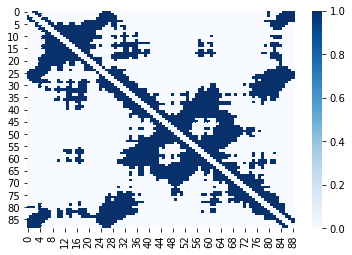

In [158]:
display(sns.heatmap(contact_map_full,cmap="Blues"))

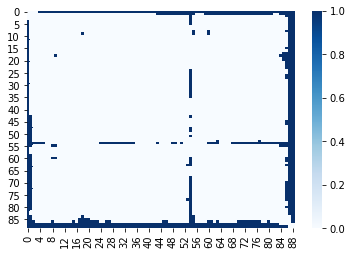

In [159]:
display(sns.heatmap(std_map_full,cmap="Blues"))

In [101]:
for fixed in aver_map:
    for pos in aver_map[fixed]:
        if pos != fixed:
            value = np.average(aver_map[fixed][pos])
            if value>1.5:
                print (2,end="")
            elif value>0.7:
                print (1,end="")
            else:
                print ("-",end="")
        else:
            print ("*",end="")
    print ("")

*---1122222222222222111111222222222222222222222222222222222222222222221111222222222221112
-*-----------------------------------------1111111111111---11111111111111111111111--11122
--*---------------------------------------------------1-------------------------------111
---*--------------------------------------------------1--------------------------------12
1---*-------------------------------------------------1--------------------------------12
1----*------------------------------------------------1--------------------------------12
2-----*--------------------------------------------------------------------------------11
2------*-------------------------------------------------------------------------------12
2-------*----------------------------------------------1----1-------------------------112
2--------*--------1------------------------------------1----1--------------------------11
2---------*----------------------------------------------------------------------------11
2---------

In [283]:
with open("archivos_importantes/pdb_para_descargar_191204.txt","w") as openfile:
    for pdb_id in pdb_para_descargar:
        openfile.write(pdb_id+"\n")

## Bloque de Codigo M01

* definir  crear_modelo_restringido(modelo,archivo_pdb,+)

In [ ]:
def crear_modelo_restringido(model,pdb)
   	if model == "SCPE_standard"
   	   	run_scpe_standar()
   	   	pass
   	elif model == "ugowt"
   	   	pass
   	elif model == "ugowf"
   	   	pass
   	return

def run_scpe_standard():
    #crear archivo de configuracion
    x_pdbfile = conf_id[0:4]+"-1_"+conf_id[-1]+".pdb"
    y_chain = conf_id[-1]
    outfilename = "inputfile_"+conf_id+".in"

    with open(outfilename,"w")  as openfile:
        for index,row in enumerate(inputfilemodel):
        if index == 2:
            openfile.write(row.replace("XXXXX",x_pdbfile))
        elif index == 3:
            openfile.write(row.replace("YYYYY",y_chain))
        elif index == 29:
            openfile.write(row.replace("WWWWW",conf_id))
                elif index == 34:
                    openfile.write(row.replace("ZZZZZ",conf_id))
                else:
                    openfile.write(row)
                openfile.write("\n")

    #corer scpe
    inputfile = "inputfile_"+conf_id+".in"
    if os.path.isfile(inputfile):
    cmd = "./scpe.exe "+inputfile+ " > "+conf_id+".out"
    err_code = os.system(cmd)
    if err_code == 0:
        print (conf_id,"OK")
        else:
    print (conf_id,err_code)
        if os.path.isfile("Contact-information.dat"):
        cmd = "mv Contact-information.dat results/Contact-information_"+conf_id+".dat"
            os.system(cmd)
        cmd = "mv "+inputfile +" done/"
        os.system(cmd)
    else:
        print ("inputfile not found for "+conf_id)
        print ("running next->")
            
    return


## Bloque de Codigo M2

### Objetivos
* Recopilar a informacion de las estructuras del ensemble_data
* Parsear los pdb, separarlos en cadenas
* Establecer la lista de archivos diferentes sobre los cuales se deben correr los modelos estructurales a cada uniprot-id.


In [142]:
uniprot_id = "P00760"
pdb_to_download = ensemble_data[uniprot_id]["PDB_in_df_work"]
print (pdb_to_download)


['3PLK', '5GXP', '3VEQ', '1F0U', '1O38', '1TNG', '5MNP', '3A87', '1C1P', '4ABA', '1TPA', '1O2W', '1V2W', '3OTJ', '2BY5', '3RXS', '3NK8', '2ZDM', '1QA0', '3PWC', '2FI3', '2ZFS', '1SBW', '3T26', '1O2M', '2BTC', '3RDZ', '3VPK', '3A84', '5MNF', '4J2Y', '2D8W', '1P2J', '1C5S', '6FID', '4AB9', '3T27', '1C2G', '1TGT', '3BTT', '3ATL', '1MTS', '1K1O', '1TX8', '3LJO', '3MFJ', '2BY8', '1K1N', '3ATM', '1XUG', '3UPE', '3GY8', '1RXP', '4GUX', '1SFI', '3ATK', '1V2R', '5MNA', '1C5T', '2ZFT', '1O33', '2AGI', '5FXL', '1GJ6', '4TPY', '3AAU', '1QCP', '1OX1', '3A8B', '1QBN', '1TX7', '1O2T', '3A80', '4NIX', '4Y11', '1O2J', '1V2N', '1Y3U', '2PTC', '1K1M', '3A7T', '4NIV', '2BLW', '3RXI', '2XTT', '1O2O', '1Y3V', '2ILN', '3RXC', '1XUI', '1V2O', '1O2V', '5MOR', '1EB2', '1O3K', '1O2I', '6B6P', '1V2S', '3NKK', '3BTQ', '1N6Y', '1O2L', '1O2R', '1UTP', '3GY4', '1PPC', '1PPE', '1O3J', '1TNH', '1NC6', '3D65', '1GI3', '4B2C', '3RXR', '2TGP', '2QYI', '2A7H', '3PLB', '2TIO', '3Q00', '4I8G', '3QK1', '3M7Q', '1Y3W', '4B2B',

## Bloque de Codigo X4

Verifica cuantos uniprot_id en la lista caped25 estan en la lista disprot que me paso gus

In [156]:
disprot_list = list()
with open("../disprot/disprot.fasta","r") as openfile:
    for line in openfile:
        if line[0] == ">":
            x = (line.replace("\n","").split("=")[1])
            disprot_list.append(x)
disprot_list.sort()
print ()


joint_set = (set(caped25) & set (disprot_list))             
print ("CAPED",len(set(caped25)))
print ("DISPROT",len(set(disprot_list)))
print ("JOINT:",len(set(joint_set)))
print (joint_set)


CAPED 1140
DISPROT 1388
JOINT: 31
{'Q9RY65', 'P0A7L8', 'P0A7U3', 'P38919', 'P02699', 'Q15418', 'P04908', 'P00760', 'P0A6H5', 'P0A877', 'P0CE48', 'Q88QP8', 'P60472', 'P60723', 'P04818', 'P41208', 'P11021', 'P01112', 'P62152', 'P04695', 'P0A7K2', 'P00441', 'P13551', 'P68363', 'P0A7S3', 'P56210', 'P00004', 'P06968', 'O67086', 'P84051', 'P0AG63'}


In [159]:
for uniprot_id in joint_set:
    pdb_chains = ensemble_data[uniprot_id]["pdb_chain_count"]
    print (uniprot_id,pdb_chains)

Q9RY65 29
P0A7L8 104
P0A7U3 101
P38919 15
P02699 63
Q15418 20
P04908 110
P00760 515
P0A6H5 54
P0A877 6
P0CE48 35
Q88QP8 7
P60472 39
P60723 105
P04818 123
P41208 8
P11021 33
P01112 184
P62152 14
P04695 22
P0A7K2 22
P00441 410
P13551 17
P68363 9
P0A7S3 108
P56210 11
P00004 59
P06968 10
O67086 5
P84051 12
P0AG63 99


# Apartado para chuspear el dataframe de Virus

In [133]:
df_virus.loc[ (df_virus["Organism"].str.contains("immunodeficiency")) ].head()


,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs,PDB_CHAIN_LIST,pdb_chain_count
3018,P04608,TAT_HV1H2,reviewed,Protein Tat (Transactivating regulatory protein),tat,Human immunodeficiency virus type 1 group M su...,86,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MEPVDPRLEPWKHPGSQPKTACTNCYCKKCCFHCQVCFITKALGIS...,11706,"[3MI9_C, 3MIA_C, 4OR5_C, 4OR5_H, 5V61_I]",5
3039,P35963,POL_HV1Y2,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1435,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSAGELDKWEKIRLRPGGKKQYRLKHIVWASRELERFAV...,362651,"[1K6C_A, 1K6C_B, 1K6P_A, 1K6P_B, 1K6T_A, 1K6T_...",44
3415,P12520,VPR_HV1N5,reviewed,Protein Vpr (R ORF protein) (Viral protein R),vpr,Human immunodeficiency virus type 1 group M su...,96,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MEQAPEDQGPQREPYNEWTLELLEELKSEAVRHFPRIWLHNLGQHI...,11698,"[1BDE_A, 1DSJ_A, 1DSK_A, 1KZS_A, 1KZT_A, 1KZV_...",8
4197,P04586,POL_HV1Z6,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,148,"Viruses, Ortervirales, Retroviridae, Orthoretr...",IPYNPQSQGVVESMNKELKKIIGQVRDQAEHLKTAVQMAVFIHNFK...,11708,"[1IHV_A, 1IHV_B, 1IHW_A, 1IHW_B, 1K6Y_C, 1K6Y_D]",6
4895,P03366,POL_HV1B1,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1447,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11678,"[1A9M_A, 1A9M_B, 1AJV_A, 1AJV_B, 1AJX_A, 1AJX_...",571


In [29]:
# guardar df en un archivo
df_virus.to_csv("archivos_importantes/df_virus_"+str(datetime.date.today())+".tsv",sep="\t")

In [337]:
len(df_virus)


567

In [10]:
df_work

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs,PDB_CHAIN_LIST,pdb_chain_count
0,P15802,AAAA_PENCH,reviewed,Acyl-coenzyme A:6-aminopenicillanic-acid-acylt...,penDE aat,Penicillium chrysogenum (Penicillium notatum),357,"cellular organisms, Eukaryota, Opisthokonta, F...",MLHILCQGTPFEIGYEHGSAAKAVIARSIDFAVDLIRGKTKKTDEE...,5076,"[2X1C_A, 2X1C_B, 2X1C_C, 2X1C_D, 2X1D_A, 2X1D_...",8
1,P84887,AAUA_ALCFA,reviewed,Aralkylamine dehydrogenase light chain (EC 1.4...,aauA,Alcaligenes faecalis,182,"cellular organisms, Bacteria, Proteobacteria, ...",MRWLDKFGESLSRSVAHKTSRRSVLRSVGKLMVGSAFVLPVLPVAR...,511,"[2AGL_D, 2AGL_H, 2AGW_D, 2AGW_H, 2AGX_D, 2AGX_...",56
3,P84888,AAUB_ALCFA,reviewed,Aralkylamine dehydrogenase heavy chain (EC 1.4...,aauB,Alcaligenes faecalis,390,"cellular organisms, Bacteria, Proteobacteria, ...",MKSKFKLTTAAAMLGLMVLAGGAQAQDKPREVLTGGHSVSAPQENR...,511,"[2AGL_A, 2AGL_B, 2AGW_A, 2AGW_B, 2AGX_A, 2AGX_...",56
5,P0AAX1,ACRZ_ECO57,reviewed,Multidrug efflux pump accessory protein AcrZ (...,acrZ Z0932 ECs0790,Escherichia coli O157:H7,49,"cellular organisms, Bacteria, Proteobacteria, ...",MLELLKSLVFAVIMVPVVMAIILGLIYGLGEVFNIFSGVGKKDQPGQNH,83334,"[5NC5_F, 5NC5_G, 5NC5_H, 5O66_M, 5O66_N, 5O66_O]",6
12,P07311,ACYP1_HUMAN,reviewed,Acylphosphatase-1 (EC 3.6.1.7) (Acylphosphatas...,ACYP1 ACYPE,Homo sapiens (Human),99,"cellular organisms, Eukaryota, Opisthokonta, M...",MAEGNTLISVDYEIFGKVQGVFFRKHTQAEGKKLGLVGWVQNTDRG...,9606,"[2K7J_A, 2K7K_A, 2VH7_A, 2W4C_A, 2W4P_A, 3TOQ_A]",6
15,P14904,AMPL_YEAST,reviewed,Vacuolar aminopeptidase 1 (EC 3.4.11.22) (Amin...,APE1 API LAP4 YSC1 YKL103C YKL455,Saccharomyces cerevisiae (strain ATCC 204508 /...,514,"cellular organisms, Eukaryota, Opisthokonta, F...",MEEQREILEQLKKTLQMLTVEPSKNNQIANEEKEKKENENSWCILE...,559292,"[4R8F_A, 4R8F_B, 4R8F_C, 4R8F_D, 5JGE_C, 5JGE_...",54
16,P20000,ALDH2_BOVIN,reviewed,"Aldehyde dehydrogenase, mitochondrial (EC 1.2....",ALDH2,Bos taurus (Bovine),520,"cellular organisms, Eukaryota, Opisthokonta, M...",MLRAVALAAARLGPRQGRRLLSAATQAVPTPNQQPEVLYNQIFINN...,9913,"[1A4Z_A, 1A4Z_B, 1A4Z_C, 1A4Z_D, 1AG8_A, 1AG8_...",8
18,O74859,APTX_SCHPO,reviewed,Aprataxin-like protein (EC 3.1.11.7) (EC 3.1.1...,hnt3 SPCC18.09c,Schizosaccharomyces pombe (strain 972 / ATCC 2...,232,"cellular organisms, Eukaryota, Opisthokonta, F...",MSVHKTNDAFKVLMNSAKEPIVEDIPKKYRKQSFRDNLKVYIESPE...,284812,"[3SP4_A, 3SP4_B, 3SPD_A, 3SPD_B, 3SPD_C, 3SPD_...",14
23,P30533,AMRP_HUMAN,reviewed,Alpha-2-macroglobulin receptor-associated prot...,LRPAP1 A2MRAP,Homo sapiens (Human),357,"cellular organisms, Eukaryota, Opisthokonta, M...",MAPRRVRSFLRGLPALLLLLLFLGPWPAASHGGKYSREKNQPKPSP...,9606,"[1LRE_A, 1NRE_A, 1OP1_A, 1OV2_A, 2FCW_A, 2FTU_...",9
26,Q9UJX3,APC7_HUMAN,reviewed,Anaphase-promoting complex subunit 7 (APC7) (C...,ANAPC7 APC7,Homo sapiens (Human),599,"cellular organisms, Eukaryota, Opisthokonta, M...",MDPGDAAILESSLRILYRLFESVLPPLPAALQSRMNVIDHVRDMAA...,9606,"[3FFL_A, 3FFL_B, 3FFL_C, 3FFL_D, 4UI9_X, 4UI9_...",21


In [31]:
timestamp = str(datetime.datetime.now()).replace("-","").replace(":","").replace(" ","")[0:12]
ed_filename = "archivos_importantes/ensemble_data_" + timestamp +".csv"

printd ("Guardando  "+ed_filename)
df_new = pd.DataFrame.from_dict(ensemble_data,orient="index")
df_new.head()
df_new.to_csv(ed_filename,header=True,index=False)
del df_new

Guardando  archivos_importantes/ensemble_data_201912121148.csv